<b><h2><center>EasyVisa Project</center></h2></b>


## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
hr = pd.read_csv("/Users/ritima/Desktop/Project/EasyVisa.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data = hr.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
# Viewing the first and last 5 rows of the dataset.
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
# Understanding the shape of the dataset.
data.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns of data.

In [7]:
# Checking the data types of the columns for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
data.duplicated().sum()

0

**Observations -**
* There are no null or duplicated values in the dataset.
* We should convert the object type columns to categories.
* We can drop the case_id column as it is a unique identifier, having no bearing on the case status.

In [9]:
# dropping the Booking_ID column
data = data.drop(["case_id"], axis=1)

In [10]:
data["case_status"].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

* The dependent variable, case_status consists of 17018 certified visas and 8462 denied visa applications.

#### Lets convert the columns with an 'object' datatype into categorical variables

In [11]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [12]:
for feature in cat_columns:  # Loop through all object type columns in the dataframe
    data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer

In [13]:
# Checking the data types for each column post conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


#### Statistical summary of the data

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations -**
* The average no_of_employees in a company is close to 5700 and maximum is greater than 600,000. There is a huge difference in the 75th percentile (3500) and maximum value (600,000) of no. of employees, indicating the presence of outliers and a right skewed distribution.
* Also, the minimum value is -26, a negative number which does not appear to be a valid data point. This must be explored further.
* There are companies in the dataset with yr_of_estab from 1800 to 2016.
* The average prevailing_wage, i.e., the wage paid to similarly employed workers in the specific occupation is close to 74500, with a minimum value of 2 and a maximum value of over 300,000. However, since the unit_of_wage is Hourly, Weekly, Monthly, and Yearly, it is difficult to draw any direct comparisons without studying the two variables together.

In [15]:
# Now, summary of categorical (non-numeric) variables in the dataset
data.describe(exclude="number").T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [16]:
# identifying the unique values of categorical variables
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

**Observations -**
* A majority (66%) of employees who applied for visa were from Asia (16861 out of 25480).
* Most of the employees (40%) had a Bachelor's degree, while the second highest was a Master's degree (38%).
* The majority (almost 60%) of the employees had previous job experience (14802 out of 25480).
* A whole majority (88%) of employees did not require job training (22525 out of 25480), signifying that most of the applicants were skilled individuals.
* Northeast, South and West (in that order) were the preferred regions of employement for the employees.
* 90% of the employers were paying their employees on a yearly basis (22962 out of 25480).
* Majority (89%) of the employer positions are full-time (22773 out of 25480).
* 67% of the visa applications were certified visas, while the remaining 33% (8462 out of 25480) were denied.

## Exploratory Data Analysis (EDA)

- EDA is an important part of this project as it is the first step towards identifying the drivers that significantly influence the case status.
- An attempt is being made to answer the following questions:

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

In [17]:
# Here is a function that plots a combined histogram and boxplot for any input numerical variable.
# Defining a function will enable running the code faster.


def histogram_boxplot(data, feature, figsize=(20, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", linewidth=2
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", linewidth=2
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="red", linestyle="-", linewidth=2
    )  # Add Mode to the histogram

In [18]:
# Let's identify the number of negative values in no_of_employees

df = data[(data["no_of_employees"]<=0)]
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


* So, there are 33 rows in the dataset with negative values for no_of_employees, which look like a data-entry error and should be removed.

In [19]:
# Removing negative entries for no_of_employees

data.drop(data[(data["no_of_employees"] <= 0)].index, inplace=True)
data.shape

(25447, 11)

* So, the 33 rows with negative values for no_of_employees have been removed.

In [20]:
data["no_of_employees"].describe().T

count     25447.000000
mean       5674.415334
std       22891.842245
min          12.000000
25%        1025.000000
50%        2112.000000
75%        3506.500000
max      602069.000000
Name: no_of_employees, dtype: float64

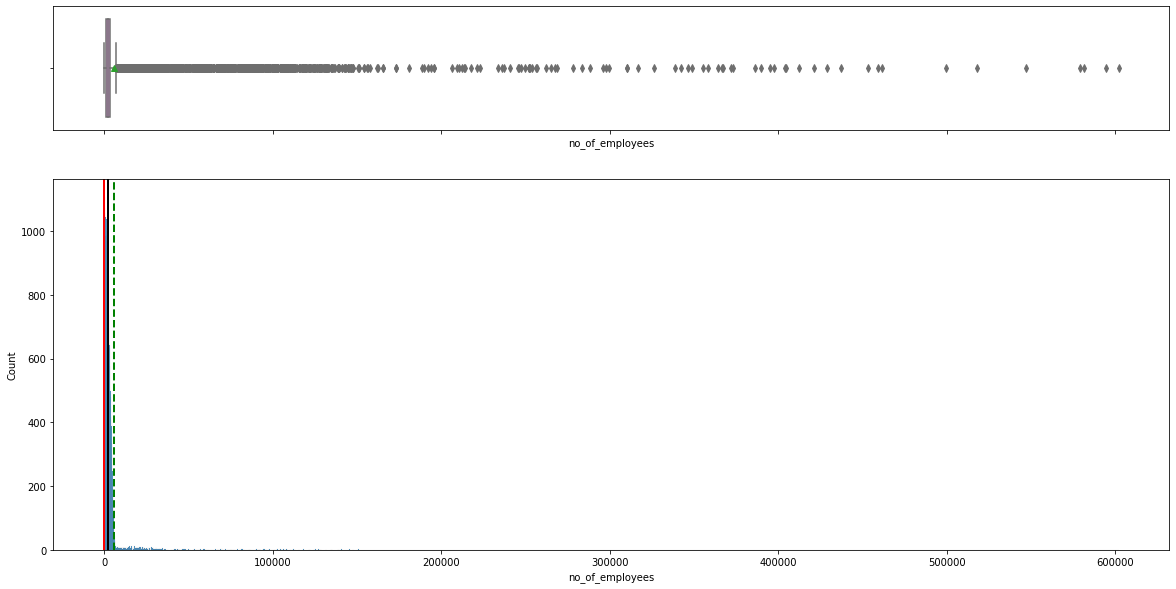

In [21]:
# Observations on no_of_employees

histogram_boxplot(data, "no_of_employees")

#### Observations
* Since the mean of `no_of_employees is 5674`, it means that `on an average the numbers of employees in a company is a little over over 5600`. The median is 2112, indicating a highly right-skewed distribution.

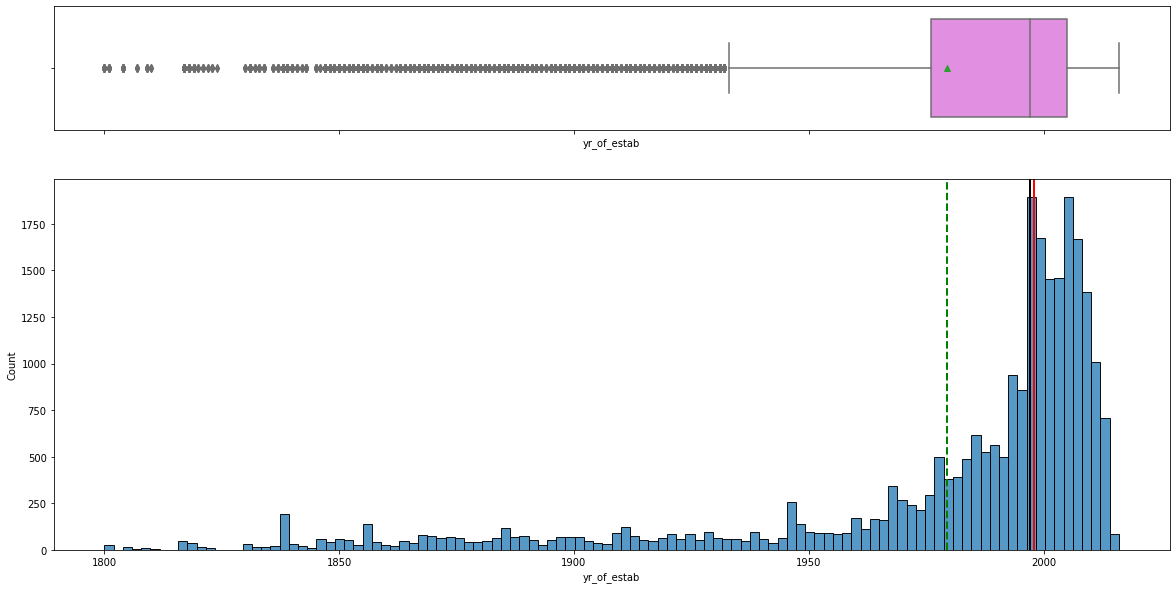

In [22]:
# Observations on yr_of_estab

histogram_boxplot(data, "yr_of_estab")

In [23]:
data.yr_of_estab.value_counts()

1998    1133
2005    1050
2001    1017
2007     992
1999     869
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64

In [24]:
data["yr_of_estab"].describe().T

count    25447.000000
mean      1979.394506
std         42.385932
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

#### Observations
* There are companies in the dataset with `yr_of_estab from 1800 to 2016`.
* The maximum number of companies were established in `1998 (mode) which was 1133`, while the majority of companies included in the dataset were concentrated between the years of 1995 to 2005.
* There are outliers on the left, signifying a `left-skewed distribution`.

### Note: prevailing_wage is separately  being observed below for each category of unit_of_wage (Hourly, Weekly, Monthly, and Yearly):

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

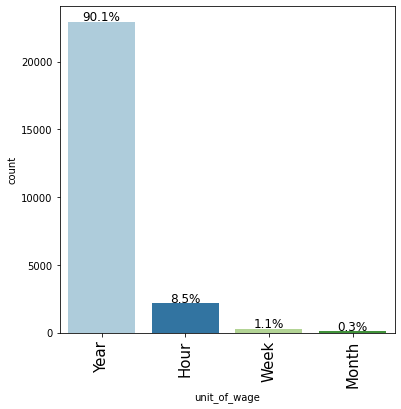

In [26]:
# Labeled barplot for unit of wage
labeled_barplot(data, "unit_of_wage")

#### Observations

* Almost `90%` (22962) of all entries have `unit_of_wage as yearly` and only `8.5%` entries (2157) as `hourly`. 
* Entries with unit_of_wage as weekly and monthly are almost negligible, at 1.1% and 0.3% respectively.

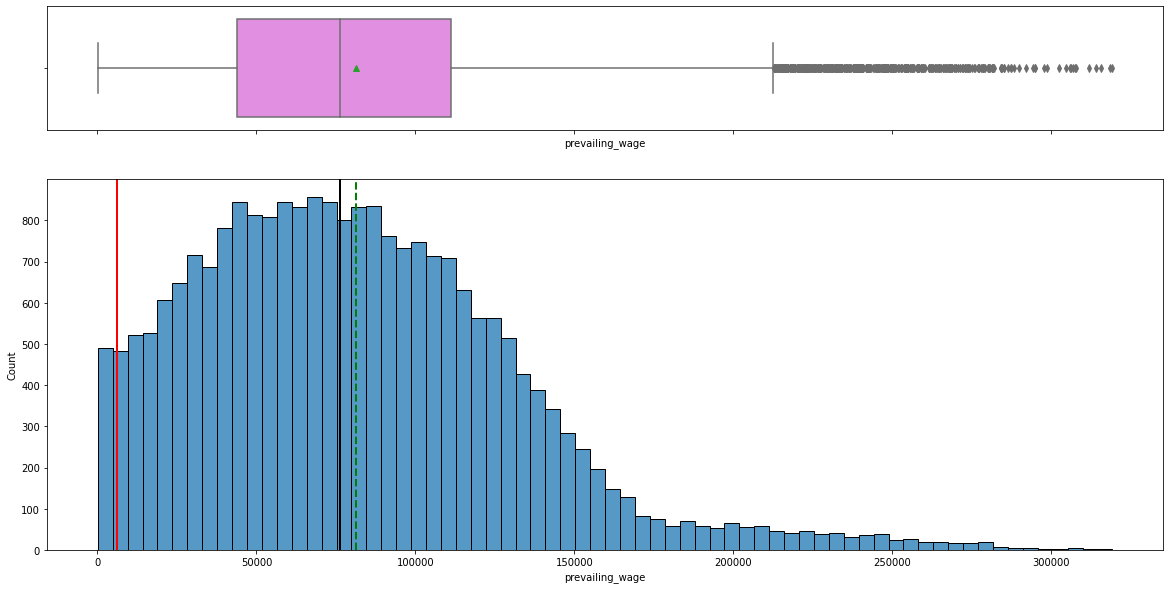

In [27]:
# Observations on prevailing_wage where unit_of_wage is yearly

histogram_boxplot(data[(data["unit_of_wage"]=="Year")], "prevailing_wage")

#### Observations

* The `average yearly prevailing_wage is USD 80,000 approximately` while the median is USD 75,000 approximately.
* The value at the 75th percetile is around USD 210,000, while the maximum prevailing_wage value extends upto USD 325,000, signifying outliers at the higher end and a `right skewed distribution`. 
* However, the value of mode is very low and the prevailing_wage also has a value of 0, which should be analysed further.

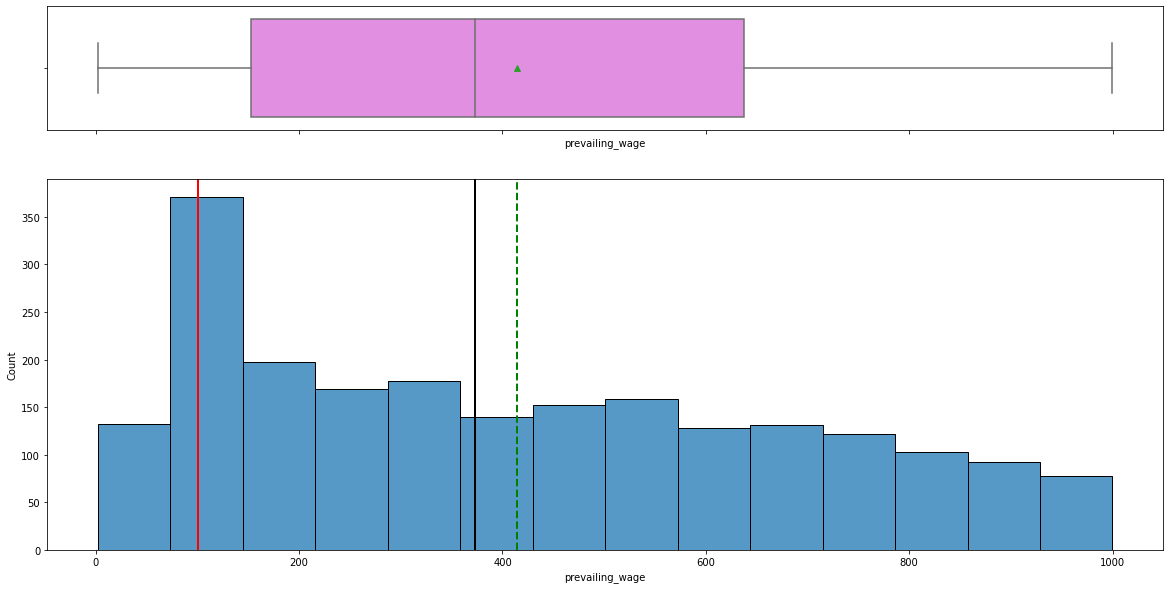

In [28]:
# Observations on prevailing_wage where unit_of_wage is hourly

histogram_boxplot(data[(data["unit_of_wage"]=="Hour")], "prevailing_wage")

#### Observations

* With respect to only 8.5% entries in the dataset where the unit_of_wage was hourly, the `average hourly prevailing_wage was USD 410 approximately`, while the median wage was USD 375 approximately.
* Since an average wage of USD 410 appears way too high, we can assume that the prevailing_wage is likely a weekly wage/salary, however, the unit_of_wage is hourly.
* Again, prevailing_wage appears to have a value of 0, which should be analysed further.

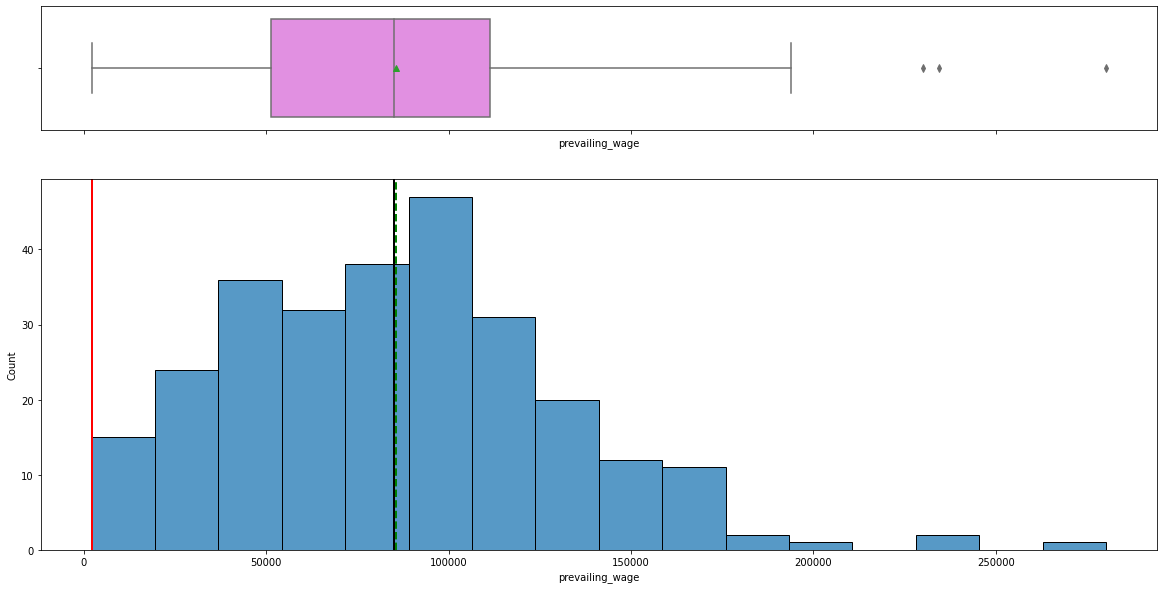

In [29]:
# Observations on prevailing_wage where unit_of_wage is weekly

histogram_boxplot(data[(data["unit_of_wage"]=="Week")], "prevailing_wage")

#### Observations

* With respect to only 1.1% entries in the dataset where the unit_of_wage was weekly, the `average and median weekly prevailing_wage was USD 85,000 approximately`.
* However, since this appears too high to be the weekly wage, we can assume that the prevailing_wage is likely a yearly salary, however, the unit_of_wage (payment) is weekly.
* Again, prevailing_wage appears to have very low values, which should be analysed further.

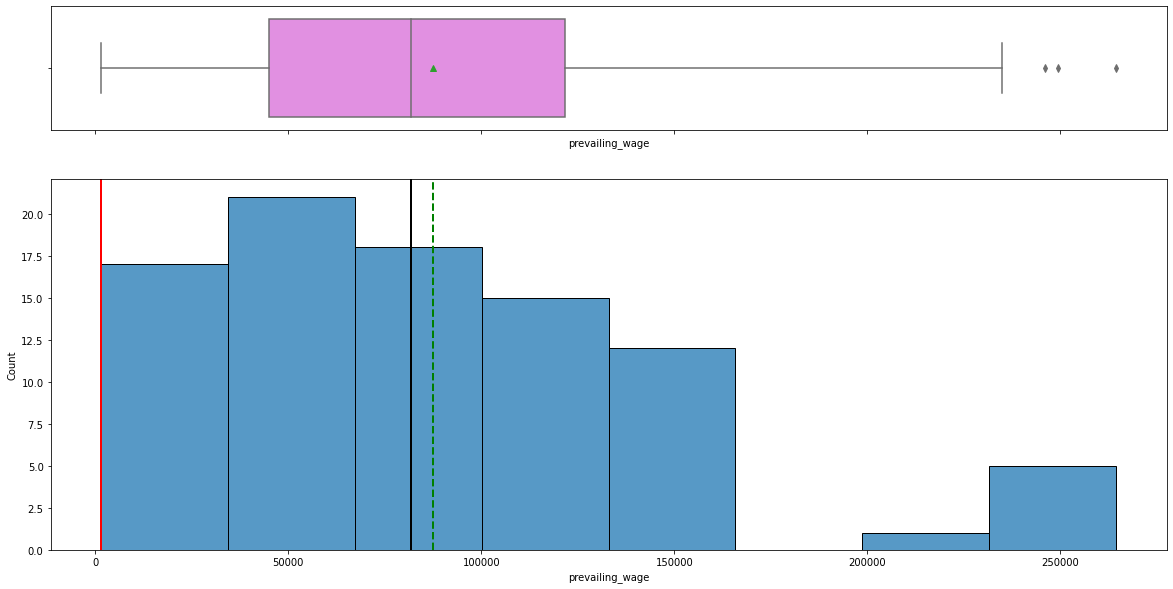

In [30]:
# Observations on prevailing_wage where unit_of_wage is monthly

histogram_boxplot(data[(data["unit_of_wage"]=="Month")], "prevailing_wage")

#### Observations

* With respect to only 0.3% entries in the dataset where the unit_of_wage was monthly, the `average and median weekly prevailing_wage was USD 85000 approximately`, while the median prevailing_wage was USD 80000 approximately.
* However, since too this appears very high to be the monthly wage, we can assume that the prevailing_wage is likely a yearly salary, however, the unit_of_wage is monthly.
* Again, prevailing_wage appears to have very low values, which should be analysed further.

<h3> From the above analysis, it can be clearly inferred that the salary is either being calculated on an yearly basis or on a weekly basis, the unit_of_wage may be any from amongst yearly, weekly, monthly or hourly. </h3>

   * On yearly basis for yearly, weekly and monthly unit_of_wage.
   * On weekly basis for hourly unit_of_wage.

<h3> Therefore, in order to clean the data and make it comparable, the hourly unit_of_wage should be converted to yearly by multiplying with 52 weeks as the wage calculation is already on weekly basis. This would leave us with only two catgories in unit_of_wage - hour and other. 

In [31]:
# Assuming 52 paid weeks per year, hourly unit_of_wage is converted into yearly unit_of_wage

data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"] = data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"]*52

In [32]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,30794.5508,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [33]:
# Converting unit_of_wage first back to object type and then to category, as new category cannot be set on categorical datatype

data["unit_of_wage"] = data["unit_of_wage"].astype('object')
data.loc[data["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hour"
data.loc[data["unit_of_wage"]=="Week", "unit_of_wage"] = "Other"
data.loc[data["unit_of_wage"]=="Month", "unit_of_wage"] = "Other"
data.loc[data["unit_of_wage"]=="Year", "unit_of_wage"] = "Other"
data["unit_of_wage"] = data["unit_of_wage"].astype('category')

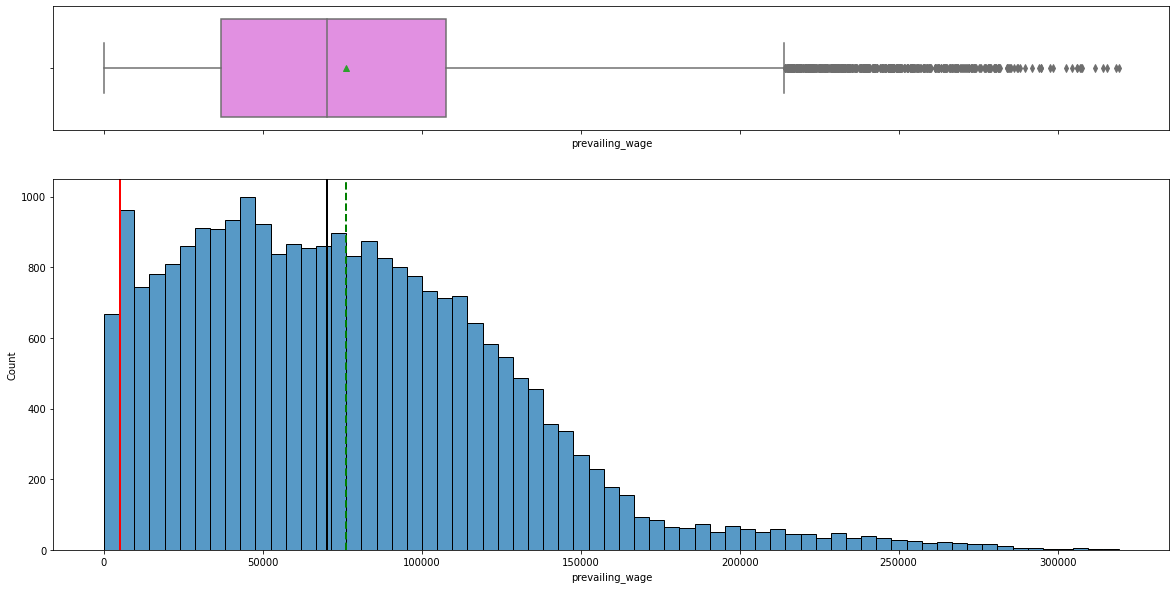

In [34]:
# Let's look at the histogram_boxplot for prevailing_wage after the above conversion.
histogram_boxplot(data, "prevailing_wage")

#### Observations

* There are still several lower and upper end outlier in annual_prevailing_wages which requires further investigation
* The `average yearly prevailing_wage is still USD 80,000 approximately` while the median is USD 75,000 approximately.
* There are outliers at the higher end, i.e., the distribution a `right skewed`. 
* Also, the prevailing_wage has a value of 0, which should be analysed further.
* `Almost similar results have been observed as compared to the chart when the unit_of_wage was 'Year' because almost negligible, 8.5% of the entries belong to the 'Hour' category.`

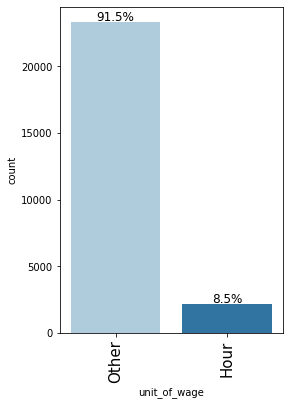

In [35]:
# Let's look at the new plot for unit_of_wage after the above conversions.
labeled_barplot(data, "unit_of_wage", perc=True)

#### Observations

* As is evident, the 'Year', 'Month' and 'Week' categories have been combined into `'Other', making for 91.5% of the total observations.`
* Only 8.5% of the observations have the unit_of_wage as 'Hour'.

### Let's look at labeled barplots for other categorical variables

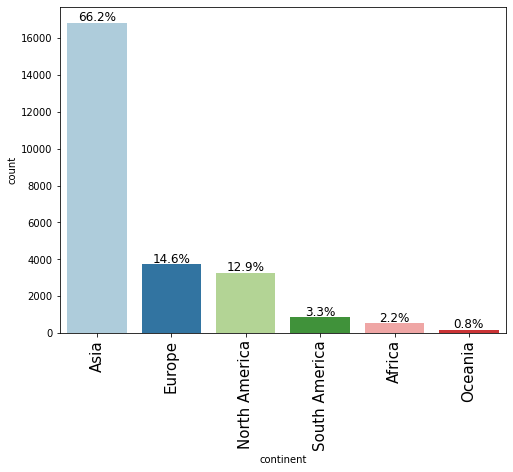

In [36]:
labeled_barplot(data, "continent")

#### Observations

* A majority (`66%`) of employees who applied for visa were from `Asia` (16861 out of 25480).
* This was followed by Europe and North America, with the least number of applications coming from Oceania.

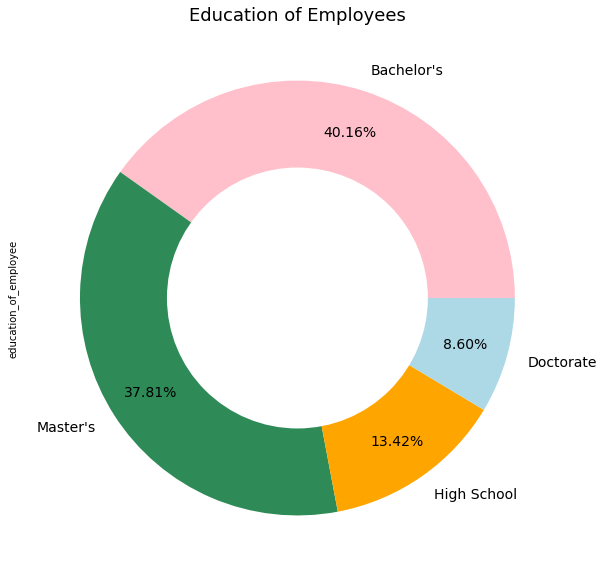

In [37]:
# Creating a donut chart for Education of Employees

plt.title("Education of Employees", fontsize=18)  # Adding title to the donut chart
data["education_of_employee"].value_counts().plot(
    kind="pie",
    colors=["pink", "seagreen", "orange", "lightblue"],
    wedgeprops={"linewidth": 3},
    textprops={"fontsize": 14},
    figsize=(10, 10),
    autopct="%0.2f%%",
    pctdistance=0.8,
)
# Creating the main pie-chart with different parameters
centre_circle = plt.Circle(
    (0, 0), radius=0.6, linewidth=3, facecolor="white"
)  # Creating a smaller center circle
fig = plt.gcf()  # Fetching the current figure
fig.gca().add_artist(centre_circle)
# Adding the center circle to the pie-chart and printing the result

#### Observations

* Majority of employees have either a `bachelor's (40%) or a master's (38%) degree`.
* 13% of the applicants have a high school diploma, while close to 9% have a doctorate degree.


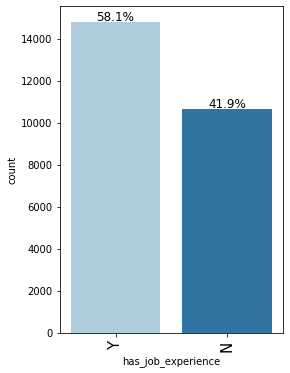

In [38]:
labeled_barplot(data, "has_job_experience")

#### Observations

* 58% employees had prior job experience, while 42% did not any prior job experience.

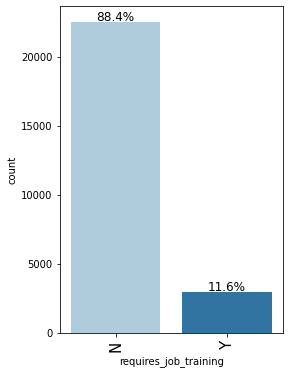

In [39]:
labeled_barplot(data, "requires_job_training")

#### Observations

* A majority (`88%`) of employees `did not require job training`, signifying that most of the applicants were skilled individuals even though they may not have had prior job experience.

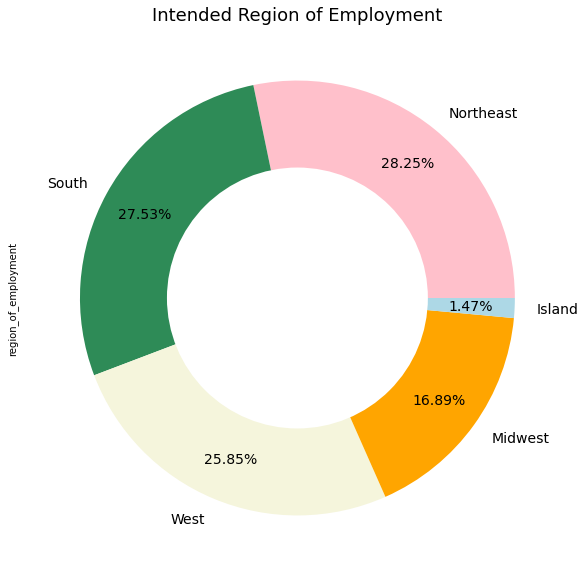

In [40]:
# Creating a donut chart for Region of Employment

plt.title("Intended Region of Employment", fontsize=18)  # Adding title to the donut chart
data["region_of_employment"].value_counts().plot(
    kind="pie",
    colors=["pink", "seagreen", "beige", "orange", "lightblue"],
    wedgeprops={"linewidth": 3},
    textprops={"fontsize": 14},
    figsize=(10, 10),
    autopct="%0.2f%%",
    pctdistance=0.8,
)
# Creating the main pie-chart with different parameters
centre_circle = plt.Circle(
    (0, 0), radius=0.6, linewidth=3, facecolor="white"
)  # Creating a smaller center circle
fig = plt.gcf()  # Fetching the current figure
fig.gca().add_artist(centre_circle)
# Adding the center circle to the pie-chart and printing the result

#### Observations

* With respect to the intended region of employment, Northeast (28%), South (27%) and West (26%) were the preferred regions of employement for the employees.
* Midwest at 17% and Island at 1% were the least preferred regions.

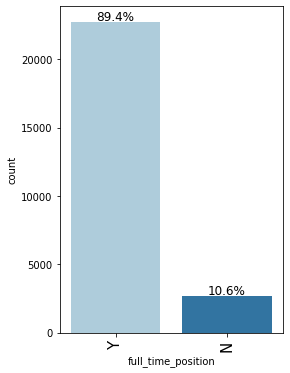

In [41]:
labeled_barplot(data, "full_time_position")

#### Observations

* Majority (89%) of the employer positions are full-time.

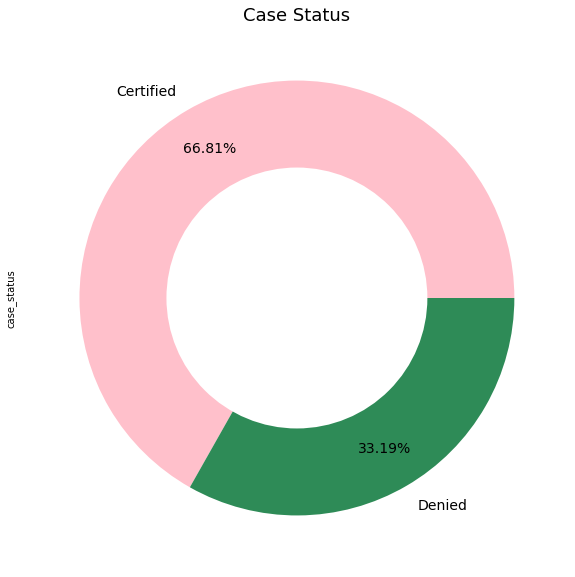

In [42]:
# Creating a donut chart for Case Status

plt.title("Case Status", fontsize=18)  # Adding title to the donut chart
data["case_status"].value_counts().plot(
    kind="pie",
    colors=["pink", "seagreen"],
    wedgeprops={"linewidth": 3},
    textprops={"fontsize": 14},
    figsize=(10, 10),
    autopct="%0.2f%%",
    pctdistance=0.8,
)
# Creating the main pie-chart with different parameters
centre_circle = plt.Circle(
    (0, 0), radius=0.6, linewidth=3, facecolor="white"
)  # Creating a smaller center circle
fig = plt.gcf()  # Fetching the current figure
fig.gca().add_artist(centre_circle)
# Adding the center circle to the pie-chart and printing the result

#### Observations

* Around 67% of the visa applications were certified/approved, while the remaining 33% were denied.

### Bivariate and Multivariate Analysis

* The questions that can be answered using bivariate analysis include:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### 1. Case Status by Education

In [43]:
# Cross-tabulating by case status and education of employees
pd.crosstab(index=data["case_status"], columns=data["education_of_employee"], margins=True)

education_of_employee,Bachelor's,Doctorate,High School,Master's,All
case_status,,,,,
Certified,6362,1910,1164,7565,17001
Denied,3858,279,2252,2057,8446
All,10220,2189,3416,9622,25447


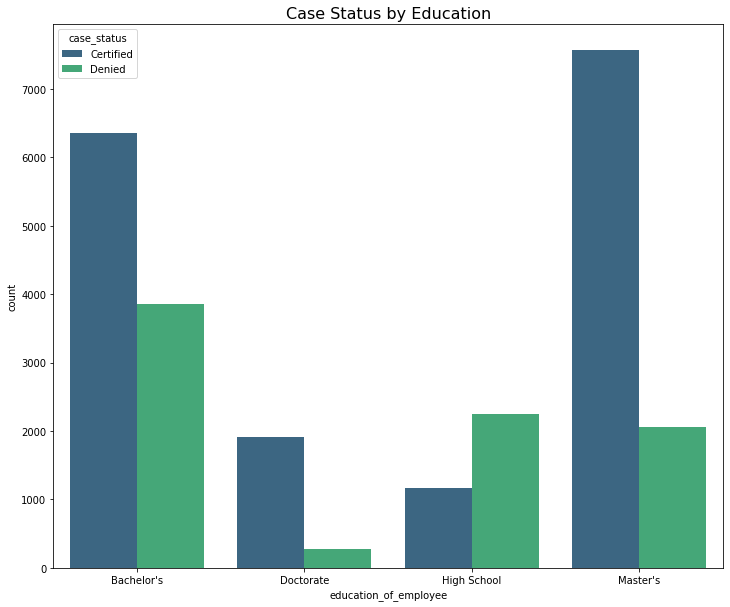

In [44]:
# Creating countplot of case status and education of employees

plt.figure(figsize=(12, 10))
sns.countplot(data=data, x="education_of_employee", hue="case_status", palette="viridis")
plt.title("Case Status by Education", fontsize=16)  # Setting plot title
plt.show()

#### Observations

* Although the majority of employees who applied had a bachelor's degree (40%), the maximum applicants whose visa got certified were those with a `master's degree (45%)`.
* This was followed by 37% approvals for applications with bachelor's degree. However, the denials were the highest in this category (46%).
* However, the ratio of approvals to denials was the worst for employees who only had a `high school certificate`. Here, the `rejections were almost twice higher` than the number of approvals.
* The ratio of `approvals to rejections was the best for employee with a doctorate`, further unscoring the importance of education in the approval process. 

Therefore, to answer the question, yes, education does play a role in Visa certification.

#### 2. Case Status by Continent

In [45]:
# Cross-tabulating by case status and continent of employees
cc = pd.crosstab(index=data["continent"], columns=data["case_status"])
cc

case_status,Certified,Denied
continent,,
Africa,396,154
Asia,11001,5839
Europe,2953,774
North America,2037,1250
Oceania,122,70
South America,492,359


Text(0.5, 0, 'Continent')

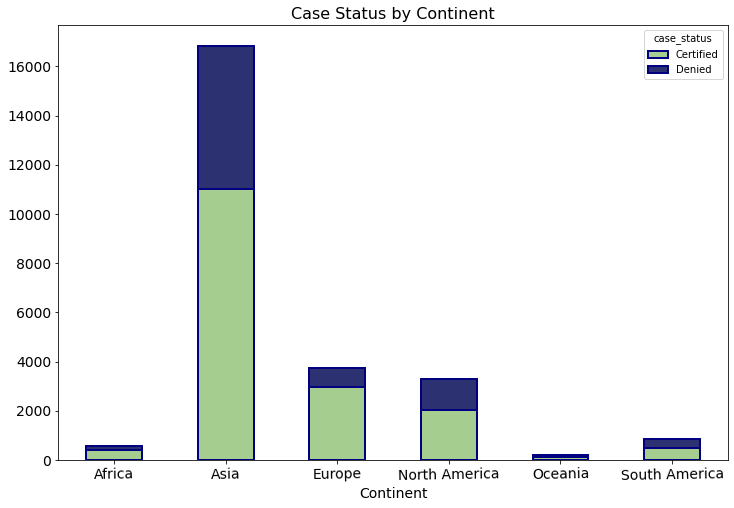

In [46]:
# Creating Stacked Bar Chart for case status and continent
cc.plot(
    kind="bar",
    colormap="crest",
    figsize=(12, 8),
    rot=1,
    stacked=True,
    linewidth=2,
    edgecolor="navy",
    fontsize=14,) 
plt.title("Case Status by Continent", fontsize=16) # Setting plot title
plt.xlabel("Continent", fontsize=14)

#### Observations

* The highest number of applications came from Asia and therefore, `65% of the total approved applications also belonged to Asia`. However, rejections were also high. `35% of applications that came from Asia got denials.`
* The ratio of approvals to denials was best for applicants from `Europe`, with only 20% of applications getting rejected. So, `80% of applications got certified.`
* However, this ratio was the `worst for South America`, with 42% denails out of the total applications filed from this region.

Hence, the Visa status does vary across different continents.

#### 3. Case Status by Job Experience

In [47]:
# Cross-tabulating by case status and job experience
pd.crosstab(index=data["case_status"], columns=data["has_job_experience"], margins=True)

has_job_experience,N,Y,All
case_status,,,
Certified,5986,11015,17001
Denied,4675,3771,8446
All,10661,14786,25447


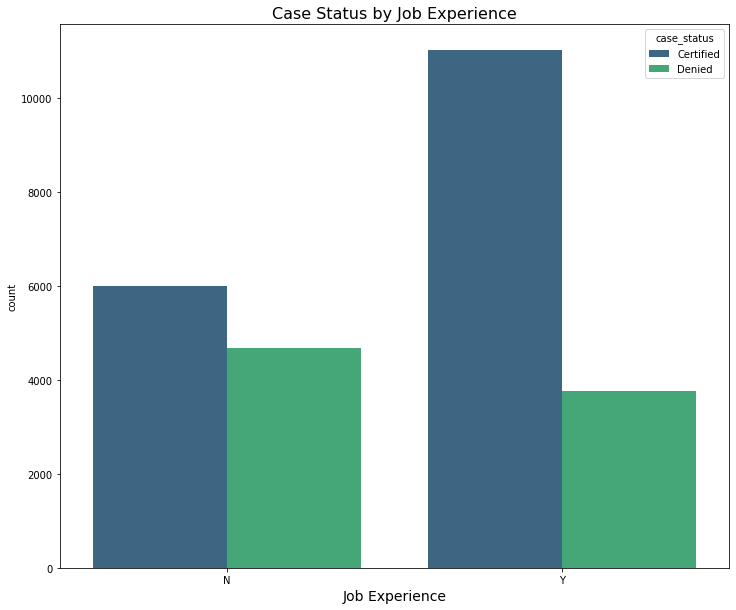

In [48]:
# Creating countplot of case status and job experience

plt.figure(figsize=(12, 10))
sns.countplot(data=data, x="has_job_experience", hue="case_status", palette="viridis")
plt.title("Case Status by Job Experience", fontsize=16)  # Setting plot title
plt.xlabel("Job Experience", fontsize=14)
plt.show()

#### Observations

* Out of the total `applications certified`, 35% belonged to applicants without prior job experience, while `65% were applicants with prior job experience`.
* It is evident that employee with prior work experience had higher chances of being certified. Applications of almost `75% of applicants with prior job experience were approved`. That means only 25% of applications in this category (i.e., applicants with job experience) were rejected.
* However, `chances of denials were higher for applicants without job experience, as high as 44%`.

Therefore, work experience does influence Visa status.

#### 4. Case Status by Unit of Wage

In [49]:
# Cross-tabulating by case status and unit of wage
pd.crosstab(index=hr["case_status"], columns=hr["unit_of_wage"], margins=True)

unit_of_wage,Hour,Month,Week,Year,All
case_status,,,,,
Certified,747,55,169,16047,17018
Denied,1410,34,103,6915,8462
All,2157,89,272,22962,25480


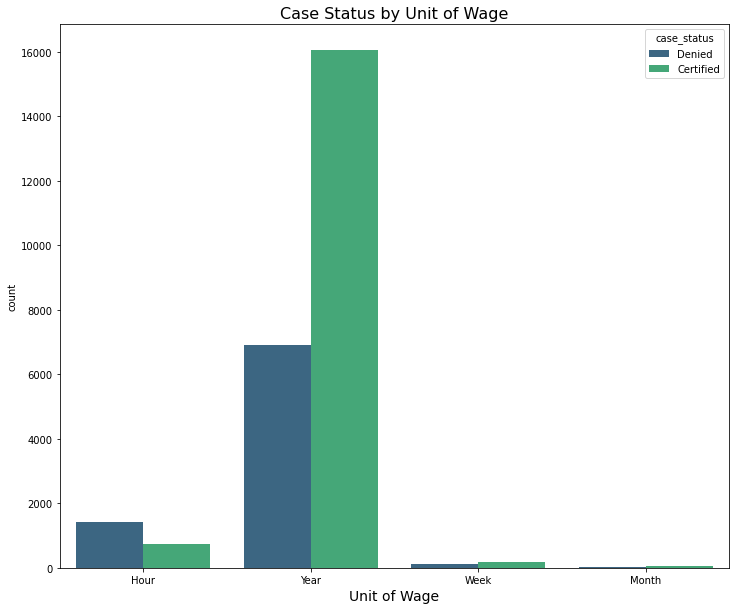

In [50]:
# Creating countplot of case status and unit of wage

plt.figure(figsize=(12, 10))
sns.countplot(data=hr, x="unit_of_wage", hue="case_status", palette="viridis")
plt.title("Case Status by Unit of Wage", fontsize=16)  # Setting plot title
plt.xlabel("Unit of Wage", fontsize=14)
plt.show()

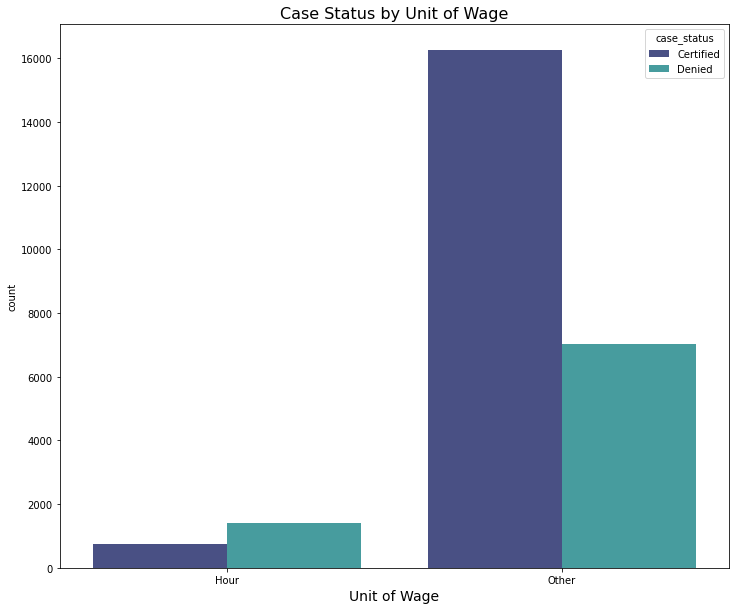

In [51]:
# Creating countplot of case status and unit of wage

plt.figure(figsize=(12, 10))
sns.countplot(data=data, x="unit_of_wage", hue="case_status", palette="mako")
plt.title("Case Status by Unit of Wage", fontsize=16)  # Setting plot title
plt.xlabel("Unit of Wage", fontsize=14)
plt.show()

#### Observations

**For the purpose of answering the Question 4, the original dataset is being used. However, as is evident from the two charts above, combining yearly, weekly and monthly unit_of_wage has not made any difference to our results, since the number of entries in weekly and monthly unit_of_wage are negligible.** 

* The chances of the visa getting approved are `maximum for the yearly pay unit`, as high as `70%` of the applications filed in this unit_of_wage category.
* For the `hourly unit_of_wage` category however, the `denials were higher (65%) than the applications approved` for this category.


Therefore, the yearly unit_of_wage is more likely to get certified for a visa.

#### 5. Case Status by Prevailing Wage

In [52]:
# Case status by prevailing wage

cpw = data.groupby(["case_status"])["prevailing_wage"].mean()
cpw

case_status
Certified    78235.945785
Denied       72276.635225
Name: prevailing_wage, dtype: float64

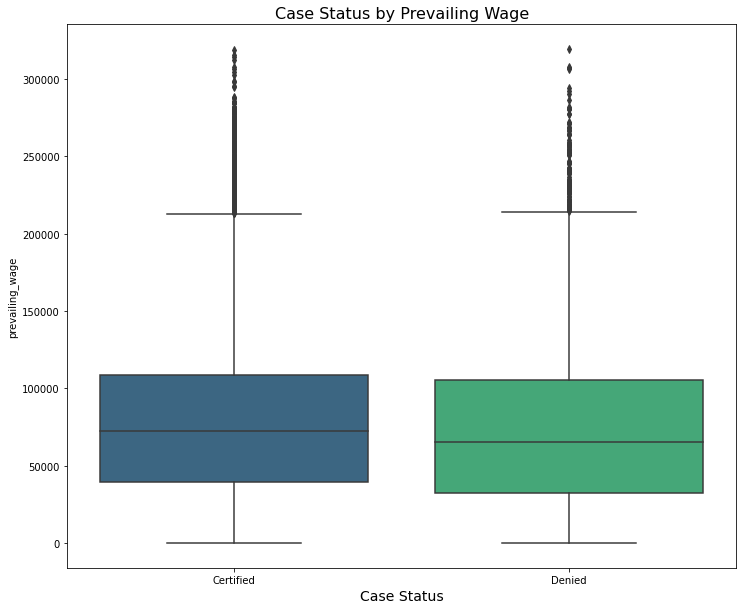

In [53]:
# Creating boxplot of case status and prevailing wage

plt.figure(figsize=(12, 10))
sns.boxplot(data=data, x="case_status", y="prevailing_wage", palette="viridis")  # Creating boxplot of Booking status by average price per room
plt.title("Case Status by Prevailing Wage", fontsize=16)  # Setting plot title
plt.xlabel("Case Status", fontsize=14)
plt.show()

#### Observations

The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

* Occupations that had a `higher prevailing_wage saw more approvals` that denials.
* For the approved applications, the average prevailing_wage was over USD 78000, while for the ones that were denaid, it stood at USD 72000 approximately. 
* There are outliers for prevailing_wage at the higher end for both approvals as well as denials.

Therefore, to answer the question, as the prevailing_wage increases, so do the approvals, but the difference is almost negligible.

#### Case Status by Number of Employees

In [54]:
# Case status by number of employees

cne = data.groupby(["case_status"])["no_of_employees"].mean()
cne

case_status
Certified    5812.843715
Denied       5395.772081
Name: no_of_employees, dtype: float64

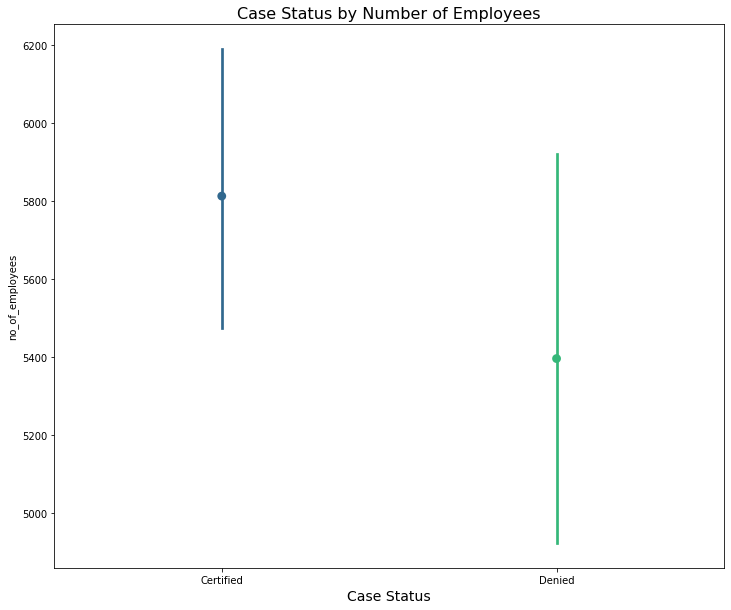

In [55]:
# Creating pointplot of case status and number of employees

plt.figure(figsize=(12, 10))
sns.pointplot(data=data, x="case_status", y="no_of_employees", palette="viridis")  
plt.title("Case Status by Number of Employees", fontsize=16)  # Setting plot title
plt.xlabel("Case Status", fontsize=14)
plt.show()

#### Observations

* Companies with `more number of employees saw more approvals`, as compared to companies that employed fewer employees.
* For the approved applications, the average number of employees was close to 5800, while the average number of employees in companies for which visa was denied was close to 5400.
* Considering the large outliers that exist in the variable 'no_of_employees', this difference seems negligible.

#### Case Status by Year of Establishment

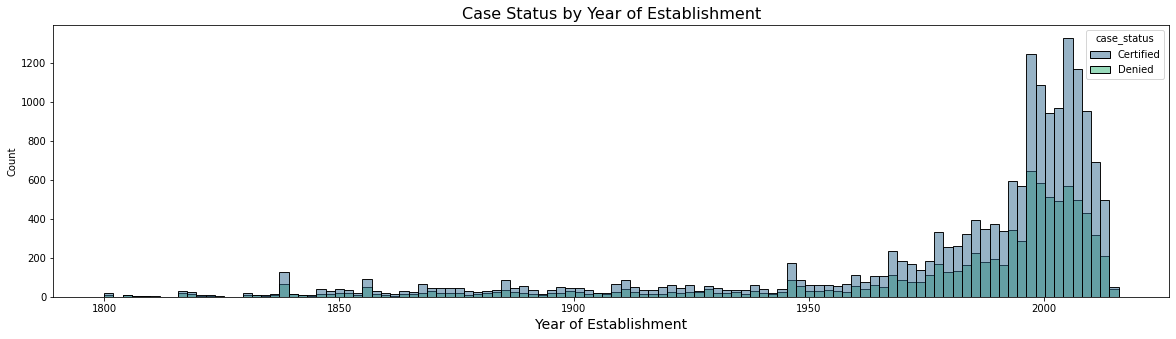

In [56]:
# Creating histplot of case status and year of establishment

plt.figure(figsize=(20,5))
sns.histplot(data, x="yr_of_estab", hue="case_status", palette="viridis")
plt.title("Case Status by Year of Establishment", fontsize=16)  # Setting plot title
plt.xlabel("Year of Establishment", fontsize=14)
plt.show()

#### Observations

* Similar to before, slightly more than 50% of all cases are certified than denied for employers irrespective of the employer's year of establishment.

#### Let's look at Case Status closer by comparing approvals vs. denials before and after the year 2000

In [57]:
cy1 = data[data["yr_of_estab"]<2000]["case_status"].value_counts()
cy1

Certified    9891
Denied       5103
Name: case_status, dtype: int64

In [58]:
cy = data.loc[data["yr_of_estab"]<2000]
cy

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Other,Y,Denied
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Other,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,21747.9496,Hour,Y,Denied
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Other,Y,Certified
12,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Other,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25471,Asia,High School,N,N,40224,1962,Island,75587.4200,Other,Y,Certified
25474,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Other,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Other,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Other,Y,Certified


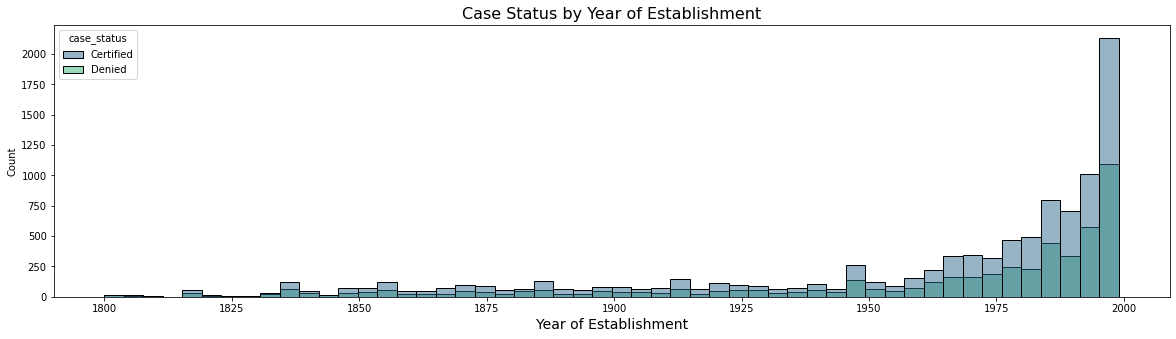

In [59]:
plt.figure(figsize=(20,5))
sns.histplot(data=cy, x="yr_of_estab", hue="case_status", palette="viridis")
plt.title("Case Status by Year of Establishment", fontsize=16)  # Setting plot title
plt.xlabel("Year of Establishment", fontsize=14)
plt.show()

In [60]:
cy2 = data[data["yr_of_estab"]>2000]["case_status"].value_counts()
cy2

Certified    6591
Denied       3060
Name: case_status, dtype: int64

In [61]:
cy3 = data.loc[data["yr_of_estab"]>2000]

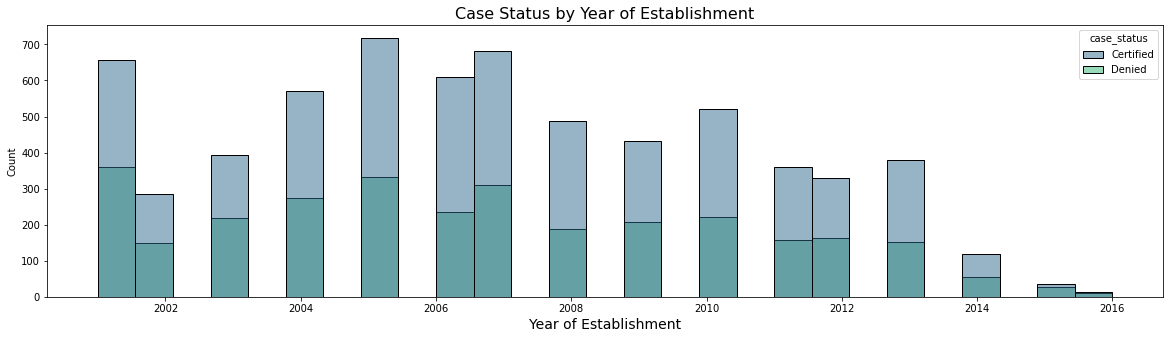

In [62]:
plt.figure(figsize=(20,5))
sns.histplot(data=cy3, x="yr_of_estab", hue="case_status", palette="viridis")
plt.title("Case Status by Year of Establishment", fontsize=16)  # Setting plot title
plt.xlabel("Year of Establishment", fontsize=14)
plt.show()

#### Case Status by Job Training

In [63]:
# Cross-tabulating by case status and job training
pd.crosstab(index=data["case_status"], columns=data["requires_job_training"], margins=True)

requires_job_training,N,Y,All
case_status,,,
Certified,15000,2001,17001
Denied,7498,948,8446
All,22498,2949,25447


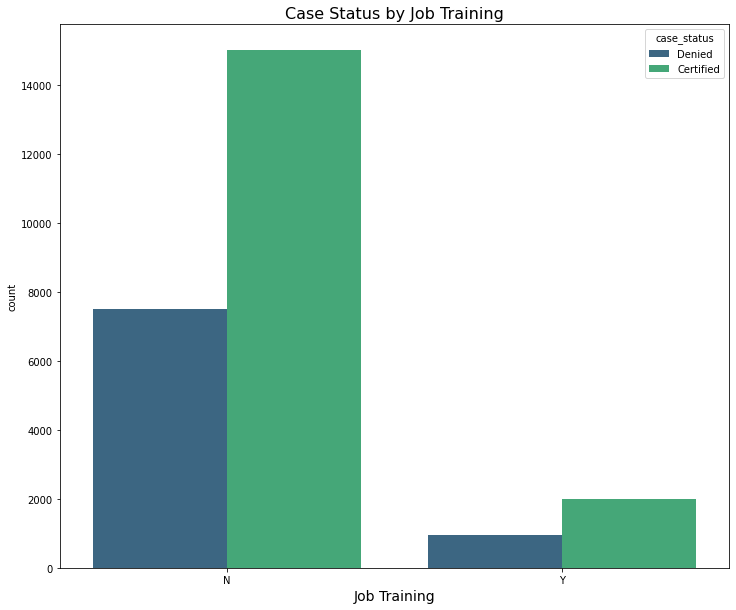

In [64]:
# Creating countplot of case status and job training

plt.figure(figsize=(12, 10))
sns.countplot(data=hr, x="requires_job_training", hue="case_status", palette="viridis")
plt.title("Case Status by Job Training", fontsize=16)  # Setting plot title
plt.xlabel("Job Training", fontsize=14)
plt.show()

#### Observations

* Of the majority of employees who did not require job training, approvals were 67% higher than denials.
* Also for the employees who did require job training, approvals were 68% higher than denials. 

#### Case Status by Region of Employment

In [65]:
# Cross-tabulating by case status and region of employment
cre = pd.crosstab(index=data["region_of_employment"], columns=data["case_status"])
cre

case_status,Certified,Denied
region_of_employment,,
Island,226,149
Midwest,3246,1053
Northeast,4524,2665
South,4908,2098
West,4097,2481


Text(0.5, 0, 'Region of Employment')

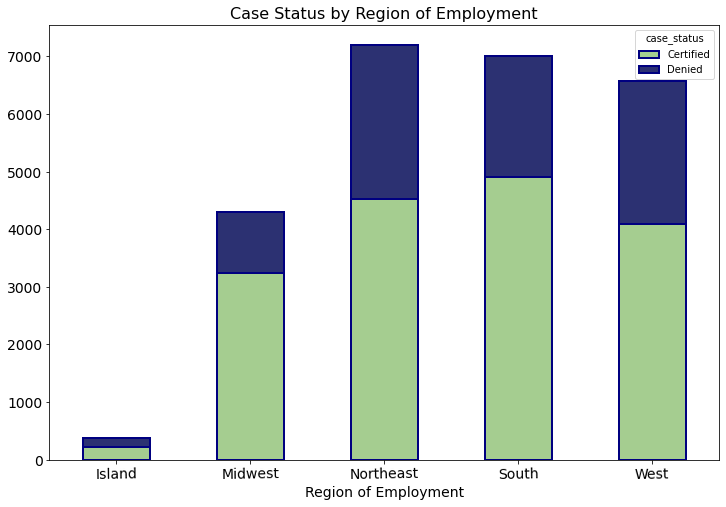

In [66]:
# Creating Stacked Bar Chart for case status and region of employment
cre.plot(
    kind="bar",
    colormap="crest",
    figsize=(12, 8),
    rot=1,
    stacked=True,
    linewidth=2,
    edgecolor="navy",
    fontsize=14,) 
plt.title("Case Status by Region of Employment", fontsize=16) # Setting plot title
plt.xlabel("Region of Employment", fontsize=14)

#### Observations

* Although the maximum number of applications were processed for the Northeast region, it was the `South region that saw the maximum number of approved applications (29% of all approved applications)`.
* This was followed by 27% approvals for the Northeast region and 24% for the West region.
* The visa denials were maximum (32%) in the Northeast region, followed by West (29%) and South (25%).
* Midwest region had the best ratio with respect to visa approvals vs. visa denials.

#### Case Status by Full-time Position (Employment Status)

In [67]:
# Cross-tabulating by case status and full-time position
pd.crosstab(index=data["full_time_position"], columns=data["case_status"], margins=True)

case_status,Certified,Denied,All
full_time_position,,,
N,1855,851,2706
Y,15146,7595,22741
All,17001,8446,25447


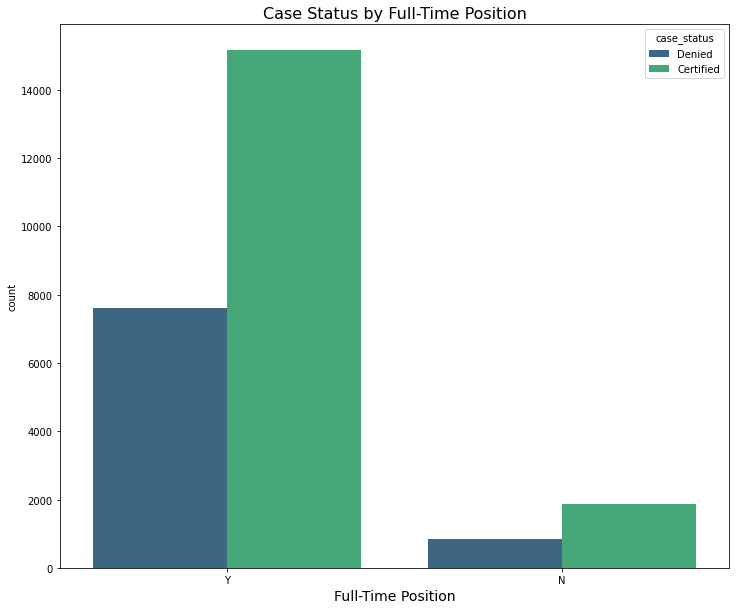

In [68]:
# Creating countplot of case status and full-time position

plt.figure(figsize=(12, 10))
sns.countplot(data=hr, x="full_time_position", hue="case_status", palette="viridis")
plt.title("Case Status by Full-Time Position", fontsize=16)  # Setting plot title
plt.xlabel("Full-Time Position", fontsize=14)
plt.show()

#### Observations

* The majority of position are full-time and visa certifications exceeded visa denials by more than 60%.
* Similarly, for the positions that were not full-time, visa certifications exceeded visa denials by more than 60%.

### Let's do some multivariate analysis
#### Let's see if there exists a relationship between the case status and the year of establishment and number of employees

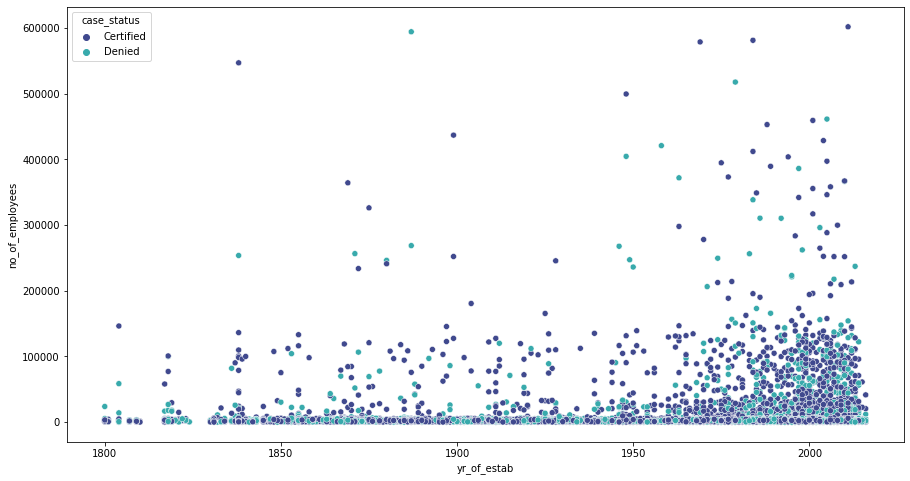

In [69]:
# Creating scatterplot of case status and year of establishment & number of employees
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x="yr_of_estab", y="no_of_employees", hue="case_status", palette="mako")
plt.show()

#### Observations

* There is greater concentration of applications around the year 2000.
* The variance in certified applications is greater than denied applications with respect to number of employees in the employer's company.

#### Let's see if there exists a relationship between the case status, number of employees and region of employment

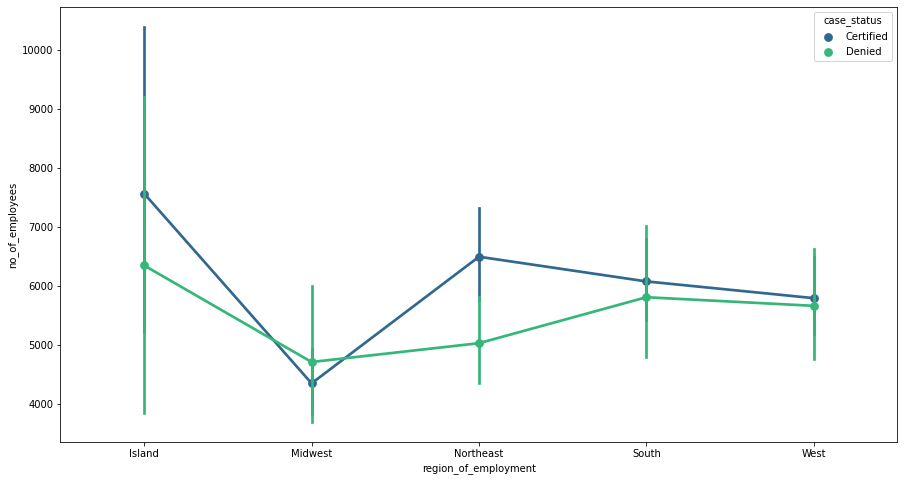

In [70]:
# Creating catplot of case status, number of employees and region of employment
plt.figure(figsize=(15, 8))
sns.pointplot(data=data, x="region_of_employment", y="no_of_employees", hue="case_status", palette="viridis")
plt.show()

#### Observations

* Although the `Island region` was the least preferred region for the foreign applicants, on an average employers in the island region had the `maximum number of employees`, as well as the `maximum numbers of visa approvals and denials.`
* The Midwest region had the least number of employees and here, the number of visa denials were greater than the applications approved.

#### Let's see if there exists a relationship between the case status, region of employment, unit of wage and prevailing wage

<Figure size 864x576 with 0 Axes>

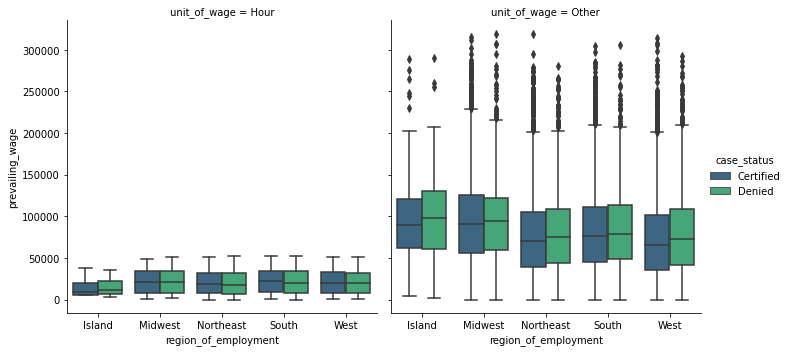

In [71]:
# Creating catplot of case status, region_of_employment and prevailing wage
plt.figure(figsize=(12, 8))
sns.catplot(data=data, x="region_of_employment", y="prevailing_wage", col="unit_of_wage", hue="case_status", kind='box', palette="viridis")
plt.show()

#### Observations

* Although the Island region was the least preferred region for the foreign applicants, the `prevailing_wage` with the unit_of_wage as 'other', i.e. yearly, was the `highest for the Island region, with higher denials than approvals.`
* The `second highest wages were in the Midwest region`, which is strange as these two were the least preferred regions by foreign applicants.
* There was a big variation in the prevailing_wages when the unit_of_wage was hourly than when it was 'other'.

#### Let's see if there exists a relationship between the case status, education of employee, prior job experience and job training requirement

<Figure size 1080x576 with 0 Axes>

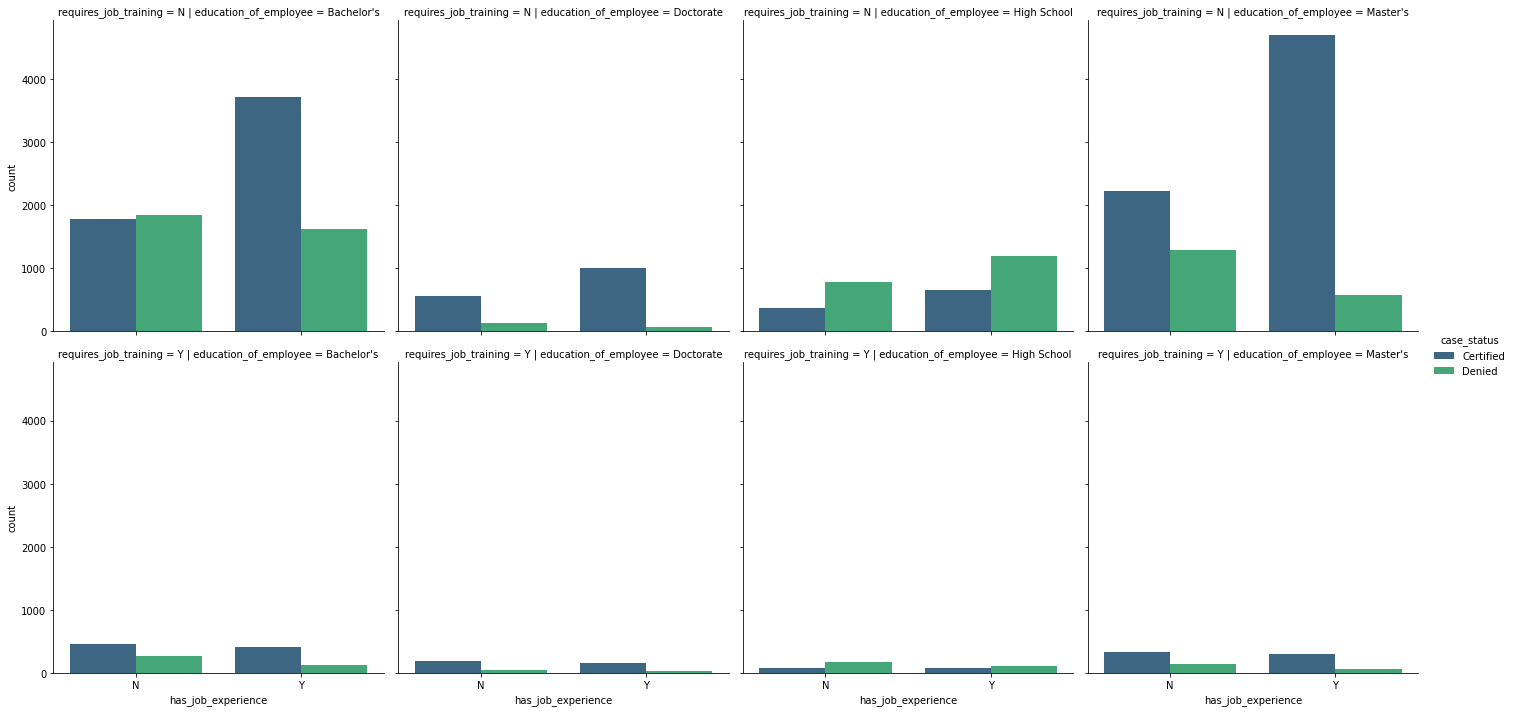

In [72]:
# Creating catplot of case status, education of employee, prior job experience and job training requirement
plt.figure(figsize=(15, 8))
sns.catplot(data=data, x="has_job_experience", hue="case_status", col="education_of_employee", row="requires_job_training", kind="count", palette="viridis")
plt.show()

#### Observations

* It is evident that `employees with a Master's degree who had prior job experience and did not require training had the maximum visa approvals`. This appears logical as these individuals have the educational qualifications as well as proven experience and do not need to be trained, hence, beneficial for any employer.
* It is worthy to note that employees who only had a `high school certificate had higher rejections than approvals`, both for employees with/without prior job experience and those that required/did not require job training.
* For the employees with a Bachelor's degree who did not have prior job experienec and still did not require job training, the denials were greater than the approvals.

#### Let's see if there exists a relationship between the case status, education of employee, prior job experience and prevailing wage

<Figure size 1080x576 with 0 Axes>

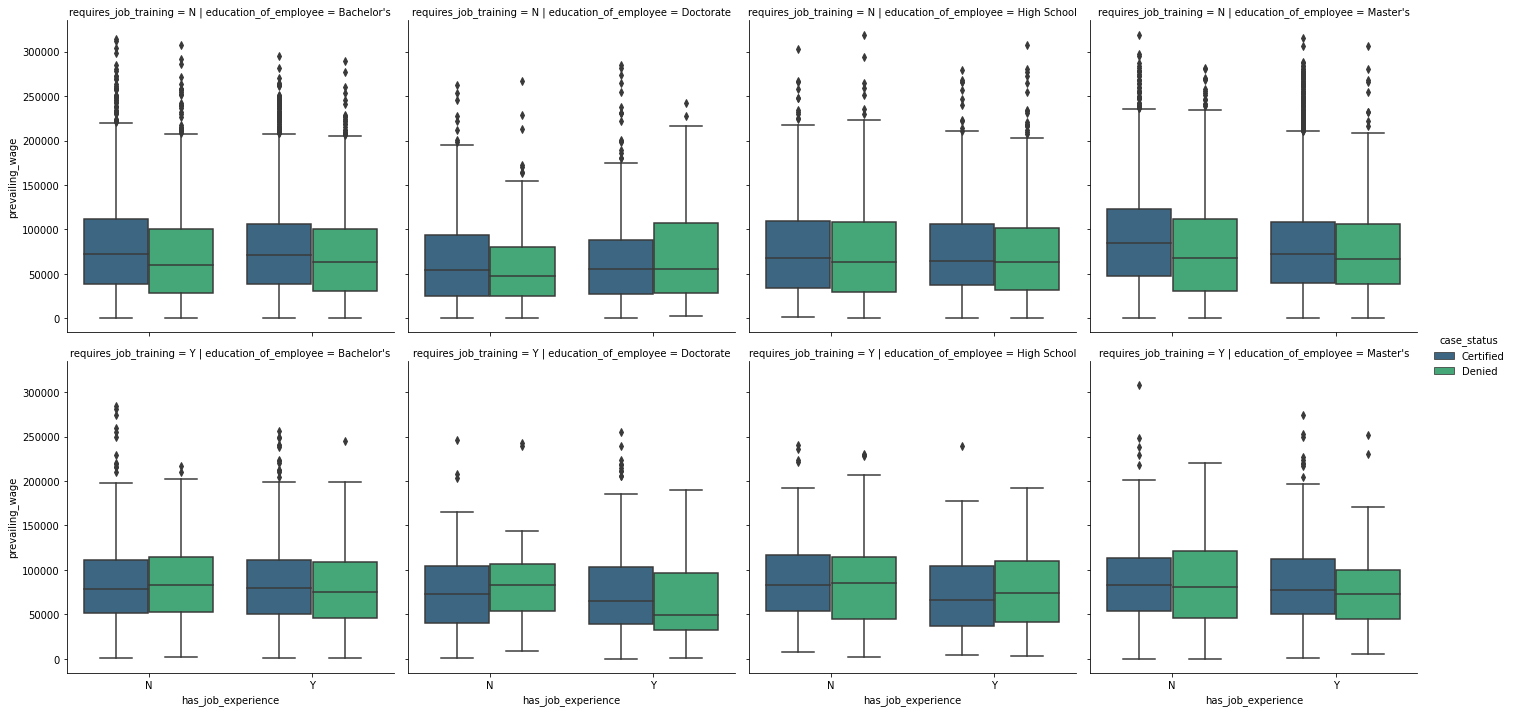

In [73]:
# Creating catplot of case status, education of employee, prior job experience, job training requirement and prevailing wage
plt.figure(figsize=(15, 8))
sns.catplot(data=data, x="has_job_experience", y="prevailing_wage", hue="case_status", col="education_of_employee", row="requires_job_training", kind="box", palette="viridis")
plt.show()

#### Observations

* There dos not appear to be a lot of variation betweeen the visa approvals and denials across the graph.
* However, it is peculiar that candidates with a `doctorate degree and prior job experience, who believed they did not require training and fell in the higher prevailing_wage category, saw higher denials than certifications`.
* The prevailing_wage was maximum for approved employees with Master's degree, who did not have prior job experience and did not require training. 

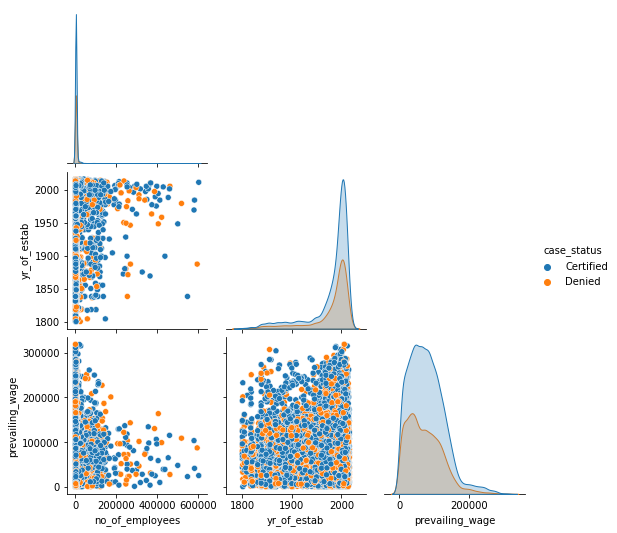

In [74]:
# In order to get two-dimensional distributions in case of multiple datasets, a 'pairplot' is being used.

sns.pairplot(data=data, kind="scatter", hue="case_status", corner=True)
# Creating a pairplot for all numerical variables

<AxesSubplot:title={'center':'Heatmap for Correlation'}>

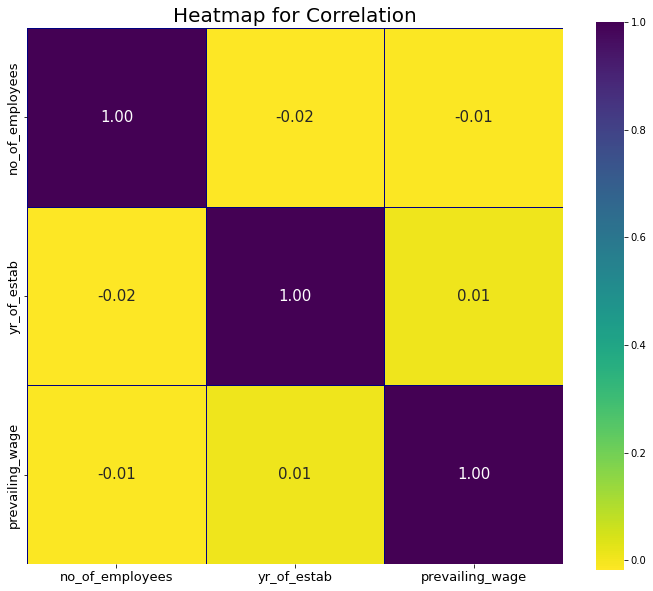

In [75]:
# Creating heatmap for showing correlations between all numerical variables
plt.figure(figsize=(12, 12))
plt.title("Heatmap for Correlation", fontsize=20)  # Setting plot title
plt.xticks(fontsize=13)  # Setting x-axis font size
plt.yticks(fontsize=13)  # Setting y-axis font size
sns.heatmap(data.corr(),
    square=True,
    linewidths=0.8,
    linecolor="navy",
    cmap="viridis_r",
    fmt=".2f",
    annot=True,
    annot_kws={"size": 15},
    cbar_kws={"shrink": 0.84})

#### Observations

* As is evident, there are no strong positive and strong negative correlations existing between the study variables.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### I. Checking for missing values

In [76]:
# checking for null values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no null values in the dataset

### II. As checked in the beginning, there were no duplicated values in the data with Case ID as being the unique identifier. However, case_id was later dropped from analyis as it has no bearing on case status.

### III. The no_of_employees column was treated and the 33 negative values for number of employees were removed. These formed just 0.1% of the data and therefore, could be excluded.

### IV. The data types for the categorical columns were fixed to begin with, as is visible below:

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  int64   
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 2.0 MB


### V.  Feature Engineering - The unit_of_wage variable was treated under EDA with the hourly unit_of_wage converted to yearly and the  Weekly, Monthly, & Yearly units combined into a new category 'Other'. 
   - This left us with only two catgories in unit_of_wage - 'Hour' and 'Other'
   - This conversion helped to clean the data and make it comparable for analysis. 

### VI. Outlier Detection and Treatment

#### Outlier Detection

In [78]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [79]:
numeric_columns = [
    "no_of_employees",
    "yr_of_estab",
    "prevailing_wage",
]

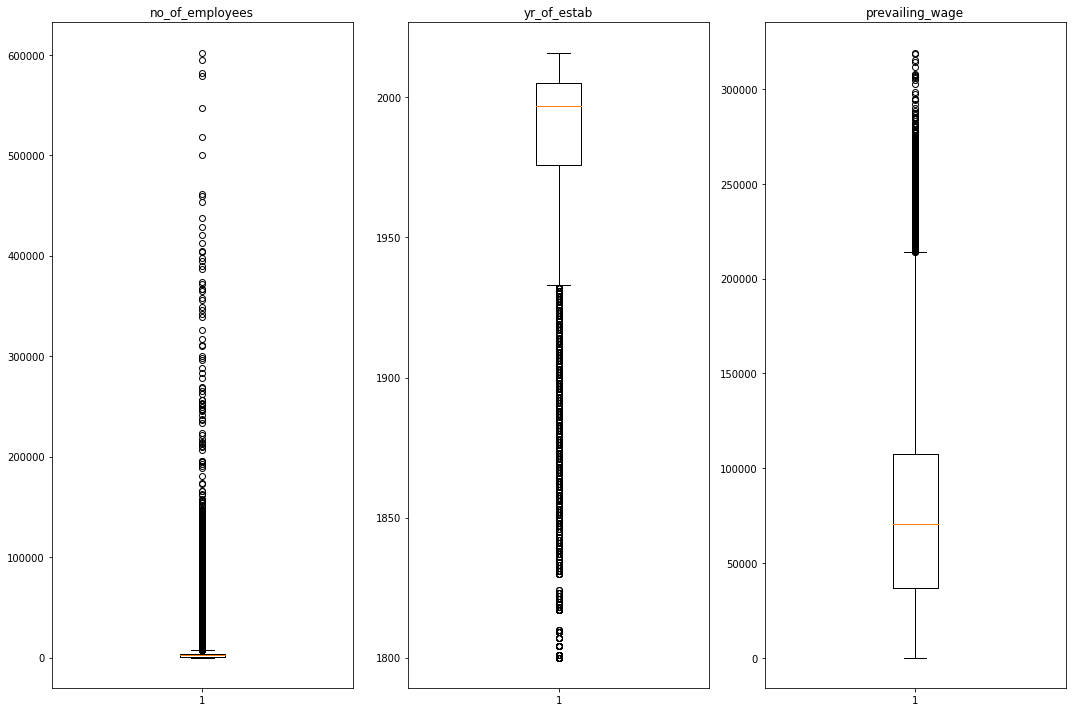

In [80]:
# Let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

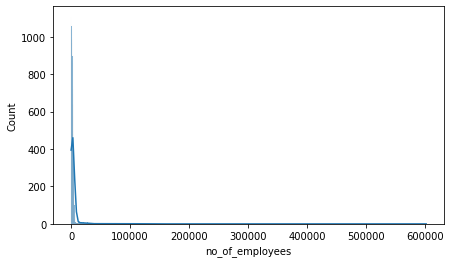

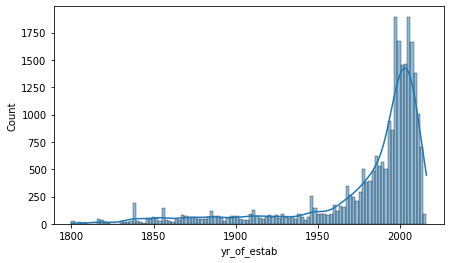

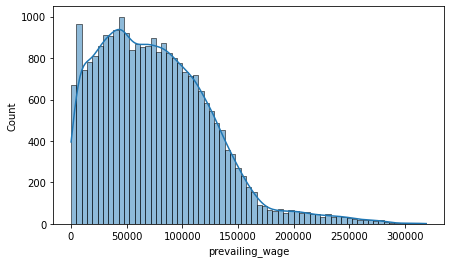

In [81]:
# let's plot all the columns to look at their distributions

for i in data.columns[data.dtypes!="category"]:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i, kde=True)
    plt.show()

#### Observations

* There are outliers in all the three numeric variables, mostly at the upper end.
* Since the values look like proper values for year of establishment and number of employees, we will not treat them.
* However, we will treat the prevailing wage column.

### Outlier Treatment

* For the prevailing_wage column, there are outliers on the higher end. 
* Instead of dropping the values altogether, we will clip these to four times the inter-quartile range.

#### Prevailing Wage

In [82]:
# Calculating the 25th quantile
Q1 = data["prevailing_wage"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["prevailing_wage"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Considering a stricter threshold of 4 times the IQR
prevailing_wage_4iqr = 4 * (IQR)

print(Q1, Q3, prevailing_wage_4iqr)
outlier_prevailing_wage = data.loc[np.abs(data['prevailing_wage']+data['prevailing_wage'].median())>prevailing_wage_4iqr, 'prevailing_wage']
outlier_prevailing_wage

36790.25 107739.505 283797.02


14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25249    216949.21
25259    218094.61
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 474, dtype: float64

* Therefore, 361 outlier values of prevailing_wage would be capped to a maximum of 283797.02

In [83]:
# Capping outlier values with upper limit

data.loc[data['prevailing_wage'] > 283797.02, 'prevailing_wage']=283797.02

<AxesSubplot:ylabel='prevailing_wage'>

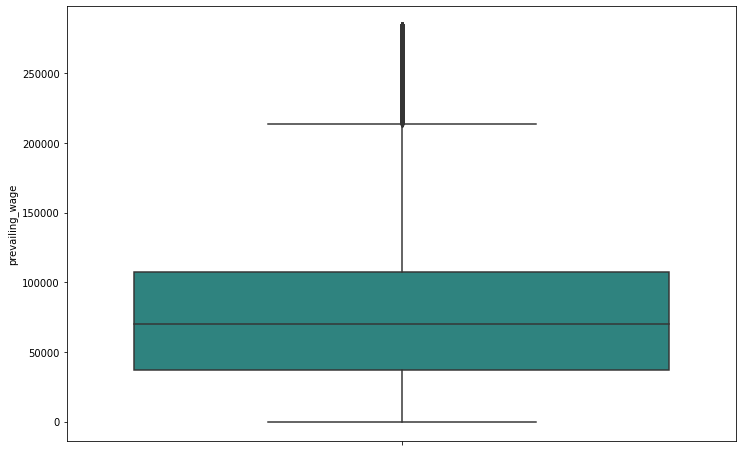

In [84]:
# Let's create a boxplot with the treated outlier values

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y="prevailing_wage", palette="viridis")

In [85]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25447.000000,25447.000000,25447.000000
mean,5674.415334,1979.394506,76241.929414
std,22891.842245,42.385932,50695.148277
min,12.000000,1800.000000,100.000000
25%,1025.000000,1976.000000,36790.250000
50%,2112.000000,1997.000000,70312.500000
75%,3506.500000,2005.000000,107739.505000
max,602069.000000,2016.000000,283797.020000


#### Observations

* The prevailing_wage has been treated and the extremes values have been capped.
* The mean and median values are close to each other at 76242 and 70313 respectively.

### VII. Creating dummies for categorical variables

In [86]:
data = pd.get_dummies(data, columns=["continent", "education_of_employee", "has_job_experience", "requires_job_training", "region_of_employment", "full_time_position", "unit_of_wage"], drop_first=True)
data.head()

,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_Y,unit_of_wage_Other
0,14513,2007,30794.5508,Denied,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,2412,2002,83425.6500,Certified,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1
2,44444,2008,122996.8600,Denied,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,98,1897,83434.0300,Denied,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,1082,2005,149907.3900,Certified,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1


In [87]:
data.shape

(25447, 20)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [88]:
# Let's look at the summary statistics of the data once again
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_Y,unit_of_wage_Other
count,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000
mean,5674.415334,1979.394506,76241.929414,0.661768,0.146461,0.129170,0.007545,0.033442,0.086022,0.134240,0.378119,0.581051,0.115888,0.168939,0.282509,0.275317,0.258498,0.893661,0.915393
std,22891.842245,42.385932,50695.148277,0.473117,0.353575,0.335395,0.086536,0.179791,0.280402,0.340916,0.484927,0.493397,0.320097,0.374706,0.450228,0.446683,0.437818,0.308277,0.278302
min,12.000000,1800.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1025.000000,1976.000000,36790.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2112.000000,1997.000000,70312.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3506.500000,2005.000000,107739.505000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,602069.000000,2016.000000,283797.020000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# Let's check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   no_of_employees                    25447 non-null  int64   
 1   yr_of_estab                        25447 non-null  int64   
 2   prevailing_wage                    25447 non-null  float64 
 3   case_status                        25447 non-null  category
 4   continent_Asia                     25447 non-null  uint8   
 5   continent_Europe                   25447 non-null  uint8   
 6   continent_North America            25447 non-null  uint8   
 7   continent_Oceania                  25447 non-null  uint8   
 8   continent_South America            25447 non-null  uint8   
 9   education_of_employee_Doctorate    25447 non-null  uint8   
 10  education_of_employee_High School  25447 non-null  uint8   
 11  education_of_employee_Master's     25447 

### Let's look at the relationship between case status and prevailing wage

In [90]:
# Case status by prevailing wage

cpw1 = data.groupby(["case_status"])["prevailing_wage"].mean()
cpw1

case_status
Certified    78219.630067
Denied       72261.004857
Name: prevailing_wage, dtype: float64

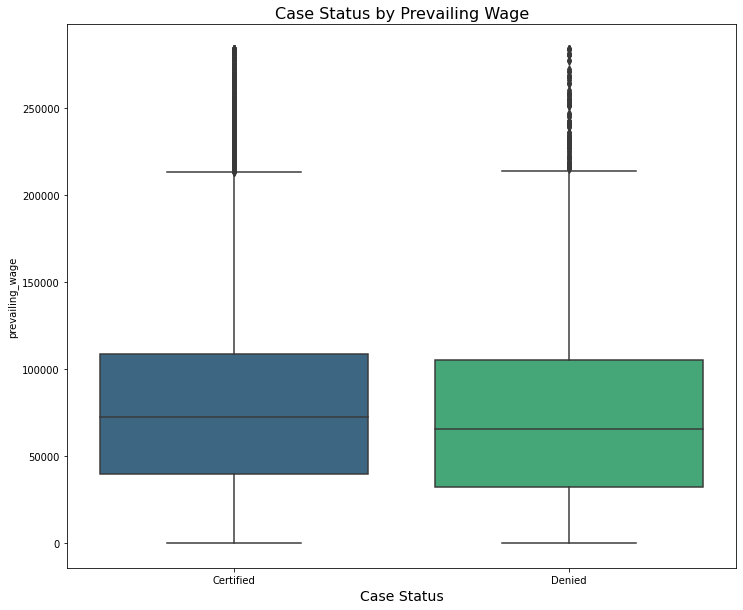

In [91]:
# Creating boxplot of case status and prevailing wage

plt.figure(figsize=(12, 10))
sns.boxplot(data=data, x="case_status", y="prevailing_wage", palette="viridis")  # Creating boxplot of Booking status by average price per room
plt.title("Case Status by Prevailing Wage", fontsize=16)  # Setting plot title
plt.xlabel("Case Status", fontsize=14)
plt.show()

#### Observations

* The mean of certified visa applications has decreased to 78219 from 78235, while those of denied applications decreased from 72276 to 72261

### Preparing data for modeling 

* We want to identify the candidates having higher chances of VISA approval.
* For preparing the data for modeling, we'll split the data into train and test to be able to evaluate the model that we build on the train data.
* The next step would be building bagging and boosting models using the train data and then check it's performance.

#### Splitting data into train and test

In [92]:
# defining X and y variables
X = data.drop("case_status", axis=1)
y = data["case_status"].apply(lambda x : 0 if x=='Denied' else 1)

In [93]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17812, 19) (7635, 19)


In [94]:
y.value_counts(1)

1    0.668094
0    0.331906
Name: case_status, dtype: float64

## Model evaluation criterion

**The model can make wrong predictions as:**
1. Predicting a visa is approved when it is actually denied. (False Positives)
2. Predicting a visa is not approved/denied when it is actualy approved. (False Negatives)

**Which case is more important? **
1. If the model predicts that the visa is approved but it is not, OFLC will have to conduct the entire reviewing process, meaning loss in respect of resources used when those could have been utilized for a deserving candidate.
2. If the model predicts that the visa is denied but it is actually approved, OFLC would incur loss on account of losing a worthy candidate.

**Which metric to optimize?**
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [95]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [96]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.659987  0.741815   0.747383  0.744589


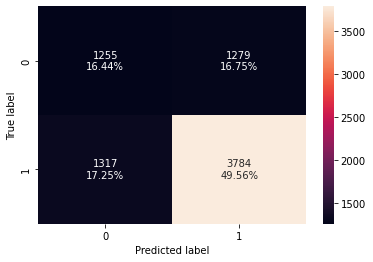

In [97]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

#### Observations
* The decision tree is overfitting the training data.
* Training metrics are high but the testing metrics are not as high.
* F1_score for the test set is only 0.74.
* We can improve model performance by hyperparameter tuning.

### Hyperparameter Tuning


In [98]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.659987  0.741815   0.747383  0.744589


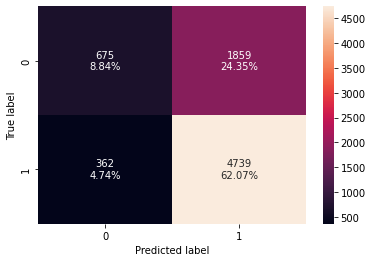

In [99]:
# Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

#### Observations

* The hyperparameter tuning for decision tree did not improve the model performance at all.
* Although the false negatives have significantly reduced from 17.3% to 4.7%, false positives have increased from 16.8% to 24.4%.
* Therefore, we will proceed with other models.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.984842  0.985798   0.991464  0.988623
   Accuracy    Recall  Precision        F1
0  0.705043  0.784748   0.776226  0.780464


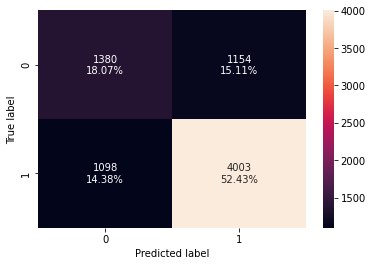

In [100]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

#### Observations

* Bagging classifier is overfitting the training data.
* There is some improvement in testing performance.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [101]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.992645  0.999328   0.989763  0.994522
   Accuracy    Recall  Precision        F1
0  0.717878  0.880416   0.744159  0.806573


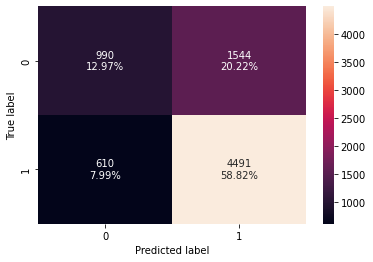

In [102]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

#### Observations

* The model is still an overfit on the training data.
* Although the false negatives have significantly reduced from 14.3% to 7.9%, false positives have increased from 15.1% to 20.2%.
* F1, Recall and Accuracy scores have improved for the test set, but let's try some other models.

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.723379  0.835326   0.770107  0.801392


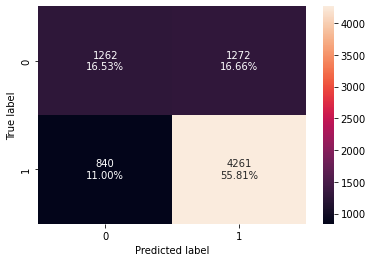

In [103]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

#### Observations

* Random forest model is also overfitting the training data.
* Let's try hyperparameter tuning.


### Hyperparameter Tuning

In [104]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, verbose=2, n_jobs=4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=5, n_estimators=150; total time=   0.5s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=5, n_estimators=200; total time=   0.7s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=5, n_estimators=250; total time=   0.8s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=6, n_estimators=150; total time=   0.5s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=6, n_estimators=150; total time=   0.5s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=6, n_estimators=200; total time=   0.7s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=6, n_estimators=200; total time=   0.7s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=6, n_estimators=250; total time=   0.8s
[CV] END max_features=0.2, max_samples=0.3, min_samples_leaf=7, n_estimators=150; total time=   0.5s
[CV] END max_features=0.2, 

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332},
                       max_features=0.6000000000000001, max_samples=0.3,
                       min_samples_leaf=5, n_estimators=250, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.793285  0.842353   0.847337  0.844838
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737132  0.807097   0.800973  0.804023


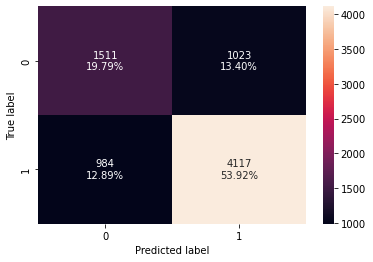

In [105]:
# Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

#### Observations

* Hyperparameter tuning has `improved the model` and decreased the overfit.
* The accuracy, precision and F1 scores have increased for the test data after hyperparameter tuning, while the recall score has decreased.
* The false positives have reduced significantly and have come closer to false negatives.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier


   Accuracy  Recall  Precision        F1
0   0.73967    0.89   0.760902  0.820404
   Accuracy    Recall  Precision        F1
0  0.735167  0.877475   0.762132  0.815746


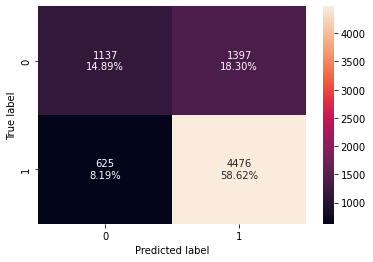

In [106]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

# Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

#### Observations

* AdaBoost default model has a very good fit on the training and test data.
* However, let's attempt to improve the model further via hyperparameter tuning.

### Hyperparameter Tuning

In [107]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=8, n_estimators=200; total time=   1.8s
[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=8, n_estimators=200; total time=   1.8s
[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=8, n_estimators=250; total time=   2.3s
[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=9, n_estimators=150; total time=   1.3s
[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=9, n_estimators=200; total time=   1.8s
[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=9, n_estimators=250; total time=   2.2s
[CV] END max_features=0.5000000000000001, max_samples=0.5, min_samples_leaf=9, n_estimators=250; total time=   2.3s
[CV] END max_features=0.5000000000000001, max_samples=0.6000000000000001, min_samples_leaf=5, n_estimators=150; total time=   1.7s
[CV] END max_features=0.5000000000000001, max_samples=0.6

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.752358  0.882941   0.776858  0.826509
   Accuracy    Recall  Precision        F1
0  0.746431  0.874338   0.774978  0.821665


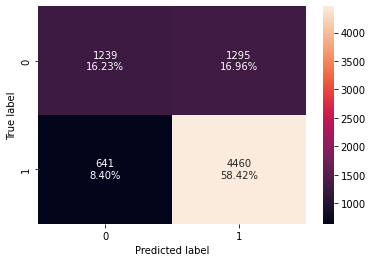

In [108]:
# Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

#### Observations

* The hyperparameter tuned AdaBoost model is `performing better` than the default AdaBoost model.
* This gives us the `highest F1 score of 0.8216 so far on test data`.
* The F1, precision and accuracy scores have increased, while there has been slight decrese in the recall score from the default AdaBoost model.
* Although the false negatives have increased from 8.2% to 8.4%, false positives have decreased from 18% to 17%.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757298  0.878824   0.784017  0.828717
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747479  0.868065   0.779166  0.821217


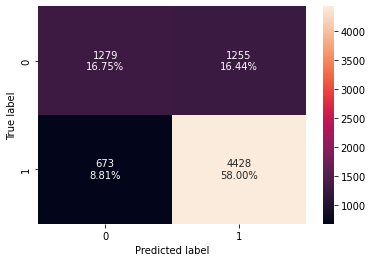

In [109]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

# Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

#### Observations

* The default gradient boosting model has a very good fit on the training and test data, with very high F1 scores of 0.829 and 0.821 respectively.
* However, let's attempt to improve the model further via hyperparameter tuning.

### Hyperparameter Tuning


In [110]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757242  0.877563   0.784598  0.828481
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.747479  0.86434   0.781045  0.820584


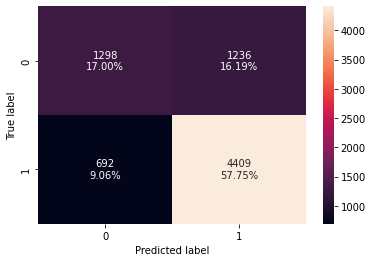

In [111]:
# Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

#### Observations
* There is no improvement in the model post hyperparameter tuning.
* The test F1 score has decreased from 0.821 to 0.820, recall has decreased from 0.868 to 0.864, accuracy has remained the same, while there is a slight improvement in the precision from 0.779 to 0.781.
* Therefore, the `default GBM is performing better than the hyperparameter tuned GBM.`

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.833988  0.928739   0.839754  0.882008
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72757  0.854538    0.76514  0.807372


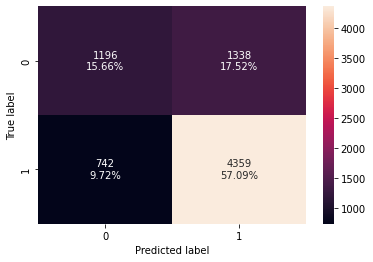

In [112]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

# Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

#### Observations

* The model does not look like an overfit.
* The F1 score is high for training and test set at 0.882 and 0.807 respectively.
* Let's attempt to improve the model further via hyperparameter tuning.

### Hyperparameter Tuning

In [113]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.751067  0.905462   0.765053  0.829357
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.742502  0.895511   0.761206  0.822915


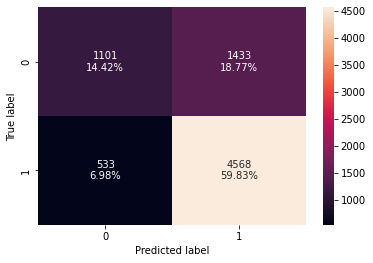

In [114]:
# Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

#### Observations

* There is `improvement` in the model post hyperparameter tuning.
* The test F1 score has increased from 0.8037 to 0.8229 and recall has also increased from 0.8545 to 0.8955, accuracy from 0.7276 to 0.7425, while precision scores have reduced a bit.

## Stacking Model

In [115]:
estimators = [('Gradient Boosting Classifier', gb_classifier), ('Adaboost Classifier Tuned', abc_tuned), ('Random Forest Tuned', rf_tuned)]
final_estimator = xgb_tuned
stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(random_state=1)),
                               ('Adaboost Classifier Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.1,
                                                   random_state=1)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(class_weight={0: 0.668,
                                                                     1: 0.332},
                                                       max_features=0.6000000000000001,
                                                       max_sa...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.05,
                                                 max_bin=256,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=30, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, reg_alpha=0,
                                                 reg_lambda=1, ...))

Training performance:
    Accuracy   Recall  Precision        F1
0  0.759544  0.87437   0.788676  0.829315
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.746562  0.861596   0.781472  0.81958


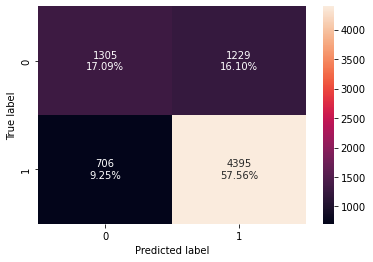

In [116]:
# Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

#### Observations

* The stacking classifier combines the best models to maximize the testing performance. 
* The above model combined the `hyperparameter tuned XGBoost model as the final estimator` with the `Gradient Boost Classifier, AdaBoost tuned and Random Forest Tuned` models as estimators, to yield a good model with an `F1 score of 0.8196`.
* The model is not overfitting and identifies the majority of cases that should be certified correctly.

## Model Performance Comparison and Conclusions


In [117]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.999944,0.793285,0.984842,0.992645,0.739670,0.752358,0.757298,0.757242,0.833988,0.751067,0.759544
Recall,1.0,1.0,1.000000,0.842353,0.985798,0.999328,0.890000,0.882941,0.878824,0.877563,0.928739,0.905462,0.874370
Precision,1.0,1.0,0.999916,0.847337,0.991464,0.989763,0.760902,0.776858,0.784017,0.784598,0.839754,0.765053,0.788676
F1,1.0,1.0,0.999958,0.844838,0.988623,0.994522,0.820404,0.826509,0.828717,0.828481,0.882008,0.829357,0.829315


In [118]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.659987,0.659987,0.723379,0.737132,0.705043,0.717878,0.735167,0.746431,0.747479,0.747479,0.727570,0.742502,0.746562
Recall,0.741815,0.741815,0.835326,0.807097,0.784748,0.880416,0.877475,0.874338,0.868065,0.864340,0.854538,0.895511,0.861596
Precision,0.747383,0.747383,0.770107,0.800973,0.776226,0.744159,0.762132,0.774978,0.779166,0.781045,0.765140,0.761206,0.781472
F1,0.744589,0.744589,0.801392,0.804023,0.780464,0.806573,0.815746,0.821665,0.821217,0.820584,0.807372,0.822915,0.819580


#### Observations

* Comparing the training and test scores for all the models, `Decision tree, Decision Tree Estimator, Random Forest Estimator, Bagging Classifier and Bagging Estimator Tuned are a clear overfit` on the training data. 
* Comparing the rest of the models, `XGBoost Classifier Tuned` gave the best model performance with the highest `F1 score at 0.8229`. It had an accuracy of 0.7425, recall of 0.8955 and precision of 0.7612 on the test data.
* This was followed closely by the `AdaBoost Classifier Tuned with an F1 score of 0.8216` and `Gradient Boost Classifier with an F1 score of 0.8212`.
* Therefore, `XGBoost Classifier Tuned has been taken as the final model`.
* Let's look at the feature importances for the same.

### Feature importance of XGBoost Classifier Tuned

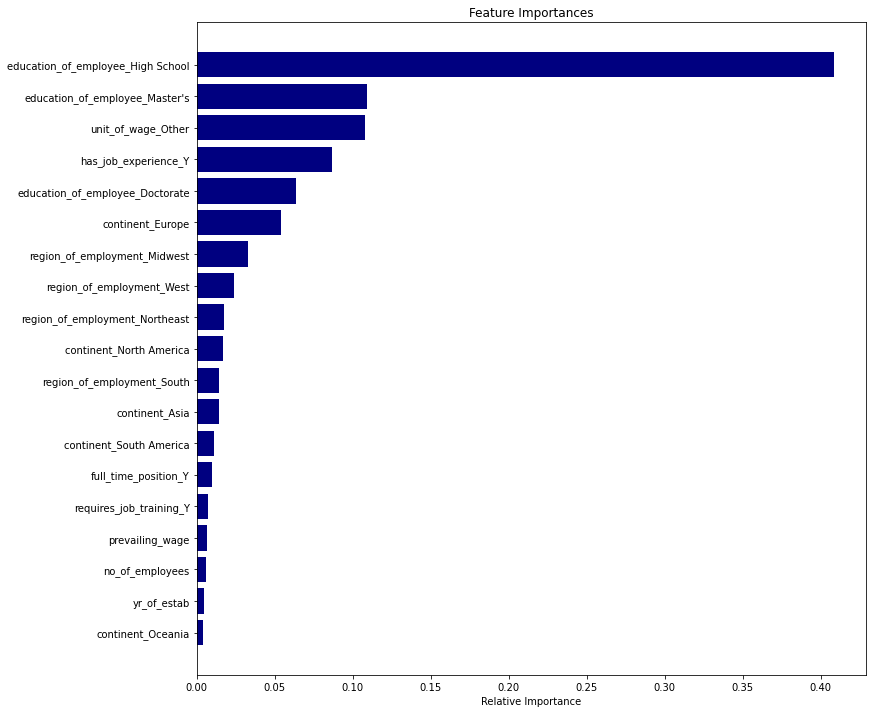

In [119]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='navy', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations & Conclusions

* `Education of the employee` was found to be the most important attribute influencing visa certifications. 
* Other important attributes included
   - prior job experience, 
   - unit of wage, 
   - continent of the employee, & 
   - preferred region of employment in the US

## Actionable Insights and Recommendations

With the increasing number of visa applicants every year, the objective of the above analysis was to devise a model to help the Office of Foreign Labor Certification (OFLC) in shortlisting the candidates having higher chances of VISA approval. The twin objectives included `facilitating the process of visa approvals` and `recommending a suitable profile for the applicants for whom the visa should be certified or denied` based on the `drivers that significantly influence the case status`.

**Since accurately predicting the number of `cases that should be certified correctly` and also those that `should be denied correctly`, an attempt was made to optimize the `F1 Score`, which balances both precision (minimization of False Positives) and recall (minimization of False negatives).**
   - Multiple classification models including decision tree, random forest, bagging, boosting and stacking were built before deciding on the best model. 
   
**The `XGBoost Classifier with hyperparameter tuning` was believed to be the best model with a high `F1 score of 0.8229, accuracy of 0.7425, precision of 0.7612 and a recall score of 0.8955`, without overfitting the data. Further, using ‘feature importances’, the variables of utmost importance were identified, which are key drivers influencing the case status. The features and their implications for OFLC are as follows:**

* `Education of employees` is the most important variable influencing visa approvals. Higher education does have a bearing on the visa application being approved. It only feels logical since the educational qualifications of employees applying for a visa should have a bearing on their visa getting certified.
    - Majority of the applicants who applied had a bachelor's (40%) or a master's degree (38%). 
    - An employee with only a high school certification has over 65% chance of visa getting denied in comparison to an employee with a `doctorate degree with over a 85% chance of visa getting certified`.
    - There appears to be a growing trend towards increasing applications from `individuals with only a high school certification`, which would eventually impact the case status, i.e., whether a visa would be approved or denied. Care should be exercised when processing such applications in future.
    
    
* `Unit of wage` has a bearing on the visa applications getting certified or not. As per the EDA as well, only `8.5%` of all applications filed were for unit of wage `Hour` and the remaining `91.5%` of all cases were for unit of wage as `Other`, which comprised of Yearly, Weekly and Monthly wages/salaries.
    - The `yearly/other category` is more likely to get certified for a visa, as high as `70% of the applications in this category get certified`. 
    - For the `hourly unit of wage` category however, the `denials were higher (65%) than the applications approved` for this category.
 
 
* `Prior job experience` is another contributing factor towards an application getting accepted for visa purposes. As per the EDA too, as many as `75% of applicants with prior job experience had their visas approved`. However, chances of visa denials were much higher, at 44%, for applicants without job experience.


* Preferred `region of employment` also had a bearing on the case status, particularly South and Midwest. Although the maximum number of applications were processed for the Northeast region (28.25%), it was the `South region that saw the maximum number of approved applications (29% of all approved applications)`. 
    - The `Midwest region had the best ratio with respect to visa approvals vs. visa denials (75% of applications made to this region were approved).`
    - The Midwest region also had a high prevailing wage, only second after the Island region.
    - Also, as per the EDA, the Midwest region had the least number of employees and saw greater number of visa denials than visa approvals.
    - These appear to be reasons enough why Midwest would be a region which could support more visa applicants in future.
    
    
* Being from `Europe is an important attribute influencing case status`. Majority of applications are from applicants from Asia (66%), Europe (15%), North America (13%) and South America (3%). However, `cases getting certified are highest for Europe (80% of applications got certified.` OFLC must keep this in consideration for future applications.


* The two numerical variables of `number of employees` and `year of establishment did not seem to have an impact on the case status`. More than twice the number of cases were certified (67%) than denied (33%) irrespective of the no_of_employees in the employer's organization and the yr_of_establishment of the employer's organization. Both these variables are largely skewed, the number of employees being skewed right, and the year of establishment being skewed left.


* Interestingly, attributes like `full time job position`, if an employee `requires further job training`, the annual `prevailing wage of the occupation` in the US are `not important attributes` & do not have much bearing on a case getting certified vs denied.
    - Majority of the applicants `did not require job training (88%)` and the EDA suggested that approvals were 67% higher than denials for these employees who did not require training. However, after the model building, this `did not appear to be an important factor` impacting case status.
    - Most of the employer positions were full-time (89.4%). This variable, thus, did not seem to have a significant impact on whether a visa application will get approved or denied.
    - `Prevailing wage` as an attribute had little influence on case status. As an attribute ripe with outliers at the higher end, this was treated by capping the extremely high values (> 4*IQR). Occupations that had a `higher prevailing wage saw more approvals that denials`.


**Thus, the chosen best model was `XGBoost Classifier Tuned`, which has been able to explain over 80% of all the information (`F1 score of 82% on the test set`). The accuracy, precision and recall were high as well, at 75%, 76% and 90% respectively. 
The confusion matrix was also able to identify a higher % of cases getting certified (false negatives), but only a smaller % of cases getting denied correctly (false positives).` This warrants further investigation into the cases that are being denied, to ensure that OFLC is not at a loss by losing worthy candidates`.**

_____